# VERİ ÖNİŞLEME SÜRECİ
Bu bölümde, aşağıdaki ana konuları ele alacağız:
* Eksik değerler
* Aykırı değerler
* Hatalar

    
   

Gerekli kütüphaneler aşağıdadır:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Python'da eksik değerler boşlukla sunulmaz - bunlar Sayı Değil'in kısaltması olan NaN aracılığıyla sunulur. Bir Sayının gerçek anlamı, eksik değerlere sahip olduğumuz tüm olası durumları tam olarak yakalayamasa da, NaN, eksik değerlere sahip olduğumuzda Python'da kullanılır.

Aşağıdaki ekran görüntüsü, tabloyu okuyan ve sunan bir pandalar veri Çerçevesini göstermektedir

## Eksik (Kayıp) değerler
Adından da anlaşılacağı gibi eksik değerler, sahip olmayı beklediğimiz ancak sahip olmadığımız değerlerdir. En basit anlamda, eksik değerler, analiz etmek için kullanmak istediğimiz bir veri kümesindeki boş hücrelerdir. Örneğin, aşağıdaki ekran görüntüsünde eksik değerlere sahip bir veri kümesi örneği gösterilmektedir 
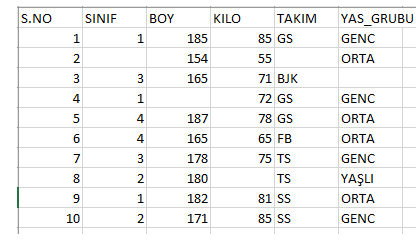

In [5]:
df=pd.read_excel('TAKIM1.xlsx')
df

,S.NO,SINIF,BOY,KILO,TAKIM,YAS_GRUBU
0,1,1.0,185.0,85.0,GS,GENC
1,2,NaN,154.0,55.0,NaN,ORTA
2,3,3.0,165.0,71.0,BJK,NaN
3,4,1.0,NaN,72.0,GS,GENC
4,5,4.0,187.0,78.0,GS,ORTA
5,6,4.0,165.0,65.0,FB,ORTA
6,7,3.0,178.0,75.0,TS,GENC
7,8,2.0,180.0,NaN,TS,YAŞLI
8,9,1.0,182.0,81.0,SS,ORTA
9,10,2.0,171.0,85.0,SS,GENC


Artık eksik değerlerin ne olduğunu ve tercih ettiğimiz analitik ortamımızda Python'da nasıl sunulduğunu biliyoruz. Ne yazık ki, eksik değerler her zaman standart bir şekilde sunulmamaktadır
Örneğin, bir pandas veri çerçevesi üzerinde NaN'a sahip olmak, eksik değerleri sunmanın standart bir yoludur. Ancak, 
eksik değerleri MV, None, 99999 ve N / A gibi bir alternatifle sunmak mümkündür. Eksik değerler standart bir şekilde sunulmazsa, ilk onlarla başa çıkmanın bir adımı bunu düzeltmektir. Bu gibi durumlarda, veri kümesindeki  eksik değerler olarak ifade ettiği değerler tespit edilip bunları np.nan ile yer değiştirilir. 

Eksik değerler standart şekilde sunulsa bile, bunları tespit etmek bazen veri kümesine göz atmak kadar kolay olabilir. Veri kümesi büyük olduğunda, eksik değerleri tespit etmek ve anlamak için verilere göz atmağa güvenilemez. Ardından, özellikle daha büyük veri kümeleri için eksik değerleri nasıl tespit edebileceğimize dikkatimizi çekeceğiz.

### Eksik değerleri tespit etme
Her Pandas veri Çerçevesi, hangi özniteliklerin eksik değerlere sahip olduğunu ve kaç tane olduğunu tespit etmede çok yararlı olan iki fonksiyonla birlikte gelir:
    .info() ve .isna().
Aşağıdaki örnek, bu işlevlerin bir veri kümesinin eksik değerlere sahip olup olmadığını ve kaç değerin eksik olduğunu algılamak için nasıl kullanılabileceğini gösterir

#### Eksik değerleri tespit etme örneği
Hava verileri Airdata.csv hava kalitesi veri kümesi, A,B VE C isimli üç konumdan 2020 yılının saatlik kayıtlarını içerir. Veri kümesi - A, B ve C üç konumu için NO2 okumalarının yanı sıra Tarih Saati, Sıcaklık, Nem, Rüzgar Hızı ve rüzgar Yönü vardır.
Aşağıdaki ekran görüntüsü, dosyayı hava veri Çerçevesine okuyan ve veri kümesinin ilk ve son birkaç satırını gösteren kodu gösterir:

In [ ]:
hava = pd.read_csv('C:/Users/ilmih/OneDrive/Masaüstü/Airdata.csv')
hava

,DateTime,Temperature,Humidity,Wind_Speed,Wind_Direction,NO2_Location_A,NO2_Location_B,NO2_Location_C
0,1/1/2020 0:00,2.180529,87,1.484318,75.963760,39.23,52.88,62.37
1,1/1/2020 1:00,1.490529,89,2.741678,113.198590,38.30,44.95,52.53
2,1/1/2020 2:00,1.690529,85,3.563818,135.000000,NaN,48.40,54.80
3,1/1/2020 3:00,1.430529,84,2.811690,129.805570,37.28,47.18,50.80
4,1/1/2020 4:00,0.840529,86,1.800000,126.869896,29.97,41.48,54.43
...,...,...,...,...,...,...,...,...
8779,12/31/2020 19:00,4.920528,72,4.553680,251.565060,53.44,32.65,66.82
8780,12/31/2020 20:00,4.990529,74,3.259939,186.340200,49.80,34.03,67.31
8781,12/31/2020 21:00,4.360529,84,10.587917,252.181120,43.32,25.55,59.33
8782,12/31/2020 22:00,3.820528,88,8.435069,219.805570,39.88,19.90,43.70


Verilerin herhangi bir sütununda eksik değer olup olmadığını tespit etmek için kullanabileceğimiz ilk yöntem .info() fonksiyonunu kullanmaktır. Aşağıdaki ekran görüntüsü


In [ ]:
hava.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DateTime        8784 non-null   object 
 1   Temperature     8784 non-null   float64
 2   Humidity        8784 non-null   int64  
 3   Wind_Speed      8784 non-null   float64
 4   Wind_Direction  8784 non-null   float64
 5   NO2_Location_A  8664 non-null   float64
 6   NO2_Location_B  8204 non-null   float64
 7   NO2_Location_C  8652 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 549.1+ KB


Önceki ekran görüntüsünde görebileceğiniz gibi, hava veri çerçevesinde  8784 satır (giriş) veri bulunur, ancak NO2_Locatıon_A, NO2_Locatıon_B ve NO2_Locatıon_C sütunlarında
daha az boş olmayan değer vardır ve bu özniteliklerin eksik değerlere sahip olduğu anlamına gelir.

Hangi özniteliklerin eksik değerlere sahip olduğunu bulmak için ikinci bir yöntem kullanmaktır.
Pandas Serisinin isnan() fonksiyonu:
Hem Pandas Veri Çerçevelerinde hem de Pandas Serisinde kullanılır.isnan() fonksiyonu ve hücrenin NaN olup olmadığını gösteren Boolean ile doldurulmuş tüm hücrelerle aynı veri yapısını verir. 
Aşağıdaki ekran görüntüsü kullanır.
hava veri çerçevesindeki  her özniteliğindeki NaN girdilerinin sayısını saymak için isnan() fonksiyonu:

In [ ]:
print('Kayıp değerlerin sayısı:')
for kolon in hava.columns:
    n_MV = sum(hava[kolon].isna())
    print('{}:{}'.format(kolon,n_MV))

Kayıp değerlerin sayısı:
DateTime:0
Temperature:0
Humidity:0
Wind_Speed:0
Wind_Direction:0
NO2_Location_A:120
NO2_Location_B:580
NO2_Location_C:132


### Eksik değerlerin teşhisi
Eksik değerlere sahip bir öznitelik aslında iki değişkenin bilgisine sahiptir: kendisi ve gizli bir öznitelik. Gizli öznitelik, değeri eksik bir değer olduğunda bir olan ve aksi takdirde sıfır olan ikili bir özniteliktir. Eksik değer türlerini (MCAR, MAR ve MNAR) bulmak için tek yapmamız gereken, özniteliğin gizli ikili değişkeni ile eksik değerlerle diğeri arasında bir ilişki olup olmadığını araştırmaktır.
 Aşağıdaki liste, eksik değer türlerinin her birine göre görmeyi beklediğimiz ilişki türlerini göstermektedir:

* MCAR: Gizli ikili değişkenin diğer özniteliklerle anlamlı bir ilişkisi olmasını beklemiyoruz.
* MAR: Gizli ikili değişken ile diğer özelliklerden en az biri arasında anlamlı bir ilişki olmasını bekliyoruz.
* MNAR: Gizli ikili değişken ile diğer özelliklerden en az biri arasında güçlü bir ilişki olmasını bekliyoruz.

Aşağıdaki alt bölümler, farklı türde eksik değerlere sahip üç durumu gösterir ve bunları teşhis etmemize yardımcı olmak için veri analitik araç setimizi kullanacağız.
Daha önce gördüğümüz aır_df veri kümesini kullanmaya devam edeceğiz. NO2_Locatıon_A, NO2_Locatıon_B ve NO2_locatıon_C'nin sırasıyla 120, 560 ve 176 eksik değere sahip olduğunu gördük. 
Her sütunun altındaki eksik değerleri birer birer teşhis etmeyi ele alacağız.

#### NO2_LOCATION_A'da eksik değerlerin teşhisi
Eksik değer türlerini teşhis etmek için elimizde iki yöntem vardır: görsel ve istatistiksel yöntemler. 
Bu tanı yöntemleri, veri kümesindeki tüm öznitelikler için çalıştırılmalıdır. Verilerde dört sayısal özellik vardır: Sıcaklık, Nem, Rüzgar Yönü ve Rüzgar hızı. Ayrıca, verilerde dört kategorik özniteliğe açılabilen bir DateTime özniteliği vardır: ay, gün, saat ve hafta içi. Analizi yürütmemiz gereken yol, sayısal nitelikler için kategorik niteliklerden farklıdır. 
Bu nedenle, önce sayısal nitelikler hakkında bilgi edineceğiz ve sonra dikkatimizi kategorik niteliklere çevireceğiz.

#### Eksik değerleri sıcaklığa (Temperature) göre teşhis etme
Görsel teşhis, iki popülasyon için sıcaklık değerleri karşılaştırılarak yapılır: birincisi, NO2_Locatıon_A için eksik değerlere sahip veri nesneleri ve ikincisi, veri nesneleri
NO2_Locatıon_A için eksik değerler olmadan. Veri Görselleştirme, Popülasyonları karşılaştırma altında, popülasyonları karşılaştırmak için veri görselleştirmelerini nasıl kullandığımızı öğrendik. Burada bu teknikleri kullanacağız. Bir kutu grafiği veya histogram kullanabiliriz
bunu yapmak için. Her ikisini de kullanalım — önce bir kutu grafiği ve ardından bir histogram.

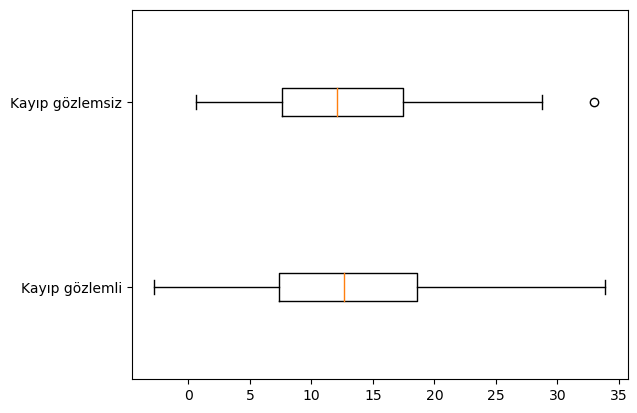

In [ ]:
BM_KD= hava.NO2_Location_A.isna() #lokasyon A için kayıp gözlemleri al
KD_etiket = ['Kayıp gözlemli','Kayıp gözlemsiz']

kutu_gr = pd.Series('',index = BM_KD.unique())

for mac in BM_KD.unique():
    BM = BM_KD == mac
    kutu_gr[mac] = hava[BM].Temperature
    
plt.boxplot(kutu_gr,vert=False)
plt.yticks([1,2],KD_etiket)
plt.show()

Önceki ekran görüntüsündeki kutuya baktığımızda, Sıcaklığın değerinin iki popülasyon arasında anlamlı bir şekilde değişmediğini görebiliriz. Bu, Sıcaklıktaki bir değişikliğin NO2_Locatıon_A altında eksik değerlerin oluşmasına neden olamayacağını veya etkileyemeyeceğini gösterir.

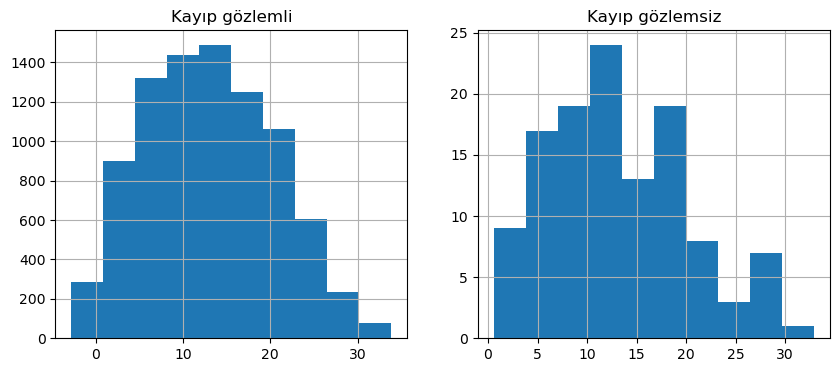

In [ ]:
BM_KD = hava.NO2_Location_A.isna()
sıcaklık_genislik = (hava.Temperature.min(),hava.Temperature.max())
MV_etiket = ['Kayıp gözlemli','Kayıp gözlemsiz']

plt.figure(figsize=(10,4))

for i,mac in enumerate(BM_KD.unique()):
    plt.subplot(1,2,i+1)
    BM = BM_KD == mac
    hava[BM].Temperature.hist()
    plt.xlim = sıcaklık_genislik
    plt.title(MV_etiket[i])

plt.show()

Önceki ekran görüntüsü, boxplots kullanırken vardığımız sonucun aynısını doğruluyor. İki popülasyon arasında anlamlı bir fark görmediğimiz için, Sıcaklık değerinin eksik değerlerin oluşmasına etki edemeyeceği veya neden olamayacağı sonucuna varıyoruz.

Son olarak, bunu istatistiksel bir yöntem kullanarak da doğrulamak istiyoruz: iki örneklemli bir t testi. İki örneklemli t testi, sayısal bir özniteliğin değerinin iki grup arasında önemli ölçüde farklı olup olmadığını değerlendirir. Buradaki iki grup, NO2_Locatıon_A altında değerleri eksik olan veri nesneleri ve NO2_Locatıon_A altında değerleri eksik olmayan veri nesneleridir.

Kısacası, iki örneklemli t testi, iki grup arasındaki özniteliklerin değeri arasında anlamlı bir fark olmadığını varsayar ve ardından hipotez doğruysa verilerin olduğu gibi ortaya çıkma olasılığını hesaplar. Bu olasılığa p değeri denir. Yani, eğer p-değeri çok küçükse, iki örneklemli t-testinin hipotezinin yanlış olabileceğinden şüphelenmek için anlamlı kanıtlarımız var.

Python kullanarak herhangi bir hipotez testini kolayca yapabiliriz. Aşağıdaki ekran görüntüsü, scipy'den ttest_ind kullanır.iki örneklemli t testi yapmak için istatistik modülü:

In [ ]:
from scipy.stats import ttest_ind # t testi
BM_KD = hava.NO2_Location_A.isna()
ttest_ind(hava[BM_KD].Temperature, hava[~BM_KD].Temperature)

Ttest_indResult(statistic=0.05646499065315542, pvalue=0.9549726689684548)

t testinin p değeri çok büyüktür. 1 üzerinden 0,95, bu da Sıcaklık değerinin ikisi arasında anlamlı bir şekilde farklı olabileceğinden şüphelenmek için herhangi bir nedenimiz olmadığı anlamına gelir
gruplar. Bu sonuç, kutu çizgileri ve histogramları kullanarak ulaştığımız sonucu doğrulamaktadır.

In [ ]:
ttest_ind(hava[BM_KD].Temperature, hava[~BM_KD].Temperature).pvalue

0.9549726689684548

#### Eksik değerleri tüm sayısal özniteliklere göre belirleme

Eksik değerlerin tam teşhisini yapmak için, Sıcaklık özelliği için yaptığımıza benzer bir analizin tüm özellikler için yapılması gerekir.
Analizin her bir bölümünün anlaşılması ve yorumlanması basit olsa da, teşhis analizinin birçok parçaya sahip olması, çok organize bir kodlama ve analiz yöntemini gerektirir.

Bunu organize bir şekilde yapmak için önce Sıcaklık için yapılabileceğini gösterdiğimiz üç analizin tümünü gerçekleştiren bir fonksiyon oluşturacağız. 
Veri kümesi dışında fonksiyon, analizi gerçekleştirmek istediğimiz sayısal özniteliğin adını ve değerleri eksik olan veri nesneleri için True, değerleri eksik olmayan veri nesnesi için False olan Boole maskesini alır. 
Fonksiyon, girilen öznitelik için kutu çizgileri, bir histogram ve t testinin p değerini verir. Aşağıdaki ekran görüntüsündeki kod, bu işlevin nasıl oluşturulduğunu gösterir.

In [ ]:
from scipy.stats import ttest_ind
def Diagnose_MV_Numerical(df,str_att_name,BM_KD):
    MV_etiket = {True:'Kayıp değerli',False:'Kayıp değersiz'}
    
    etiket=[]
    kutu_gr = pd.Series('',index = BM_KD.unique())    
    for mac in BM_KD.unique():
        BM = BM_KD == mac
        kutu_gr[mac] = df[BM][str_att_name].dropna()
        etiket.append(MV_etiket[mac])
   
    plt.boxplot(kutu_gr,vert=False)
    plt.yticks([1,2],etiket)
    plt.xlabel(str_att_name)
    plt.show()
    
    plt.figure(figsize=(10,4))
    
    att_range = (df[str_att_name].min(),df[str_att_name].max())

    for i,mac in enumerate(BM_KD.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_KD == mac
        df[BM][str_att_name].hist()
        plt.xlim = att_range
        plt.xlabel(str_att_name)
        plt.title(MV_etiket[mac])

    plt.show()
    
    grup_1_veri = df[BM_KD][str_att_name].dropna()
    grup_2_veri = df[~BM_KD][str_att_name].dropna()
    
    p_değeri = ttest_ind(grup_1_veri,grup_2_veri).pvalue
    
    print('t testi için p-değeri: {} olarak bulunur'.format(p_değeri))

Temperature için Kayıp değerleri teşhis etme :


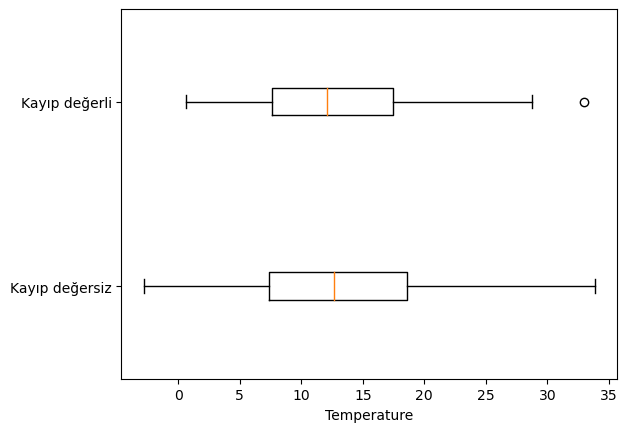

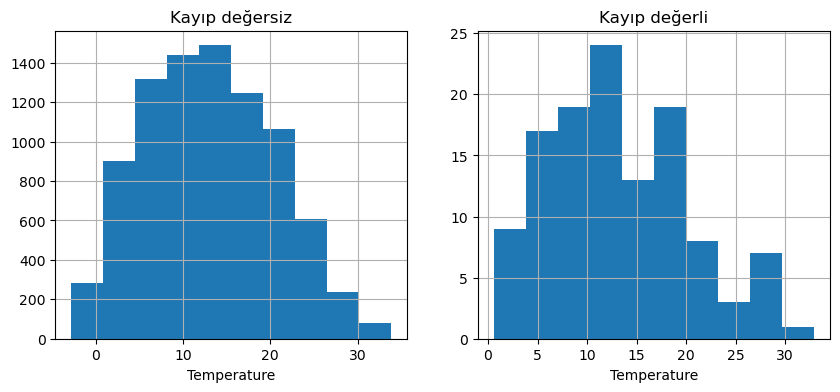

t testi için p-değeri: 0.9549726689684548 olarak bulunur
- - - - - - - - - - - - ************************* - - - - - - - - - - - 
Humidity için Kayıp değerleri teşhis etme :


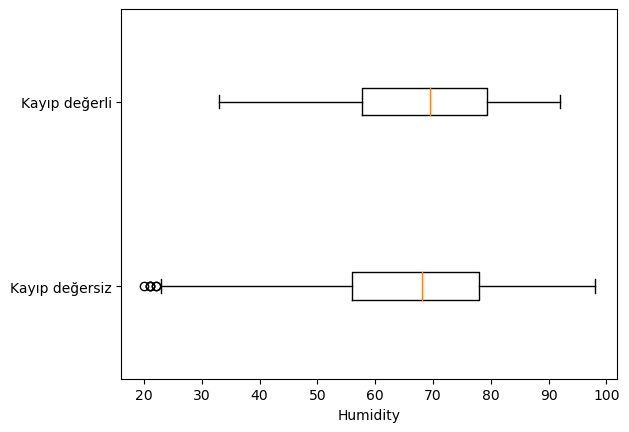

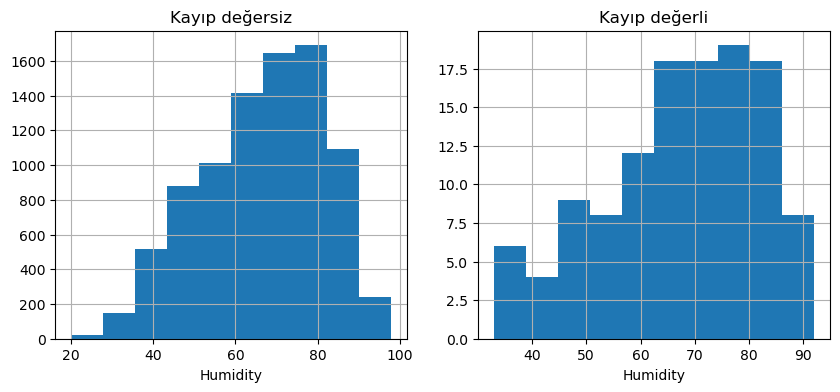

t testi için p-değeri: 0.5593319830352679 olarak bulunur
- - - - - - - - - - - - ************************* - - - - - - - - - - - 
Wind_Speed için Kayıp değerleri teşhis etme :


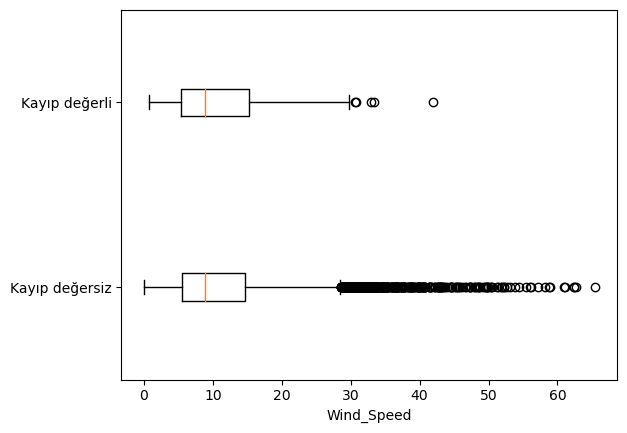

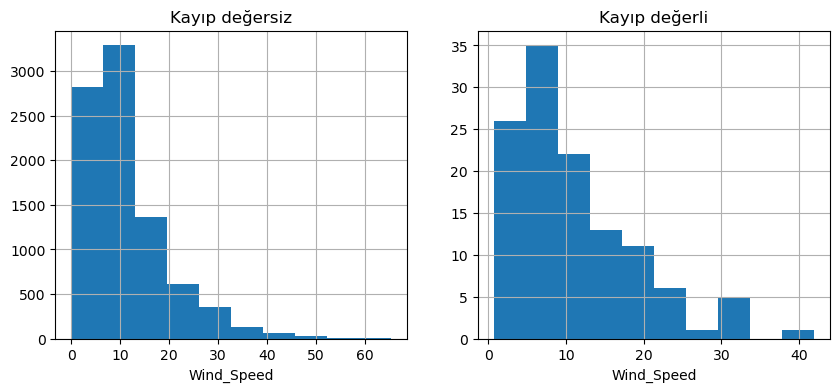

t testi için p-değeri: 0.8172472856083665 olarak bulunur
- - - - - - - - - - - - ************************* - - - - - - - - - - - 
Wind_Direction için Kayıp değerleri teşhis etme :


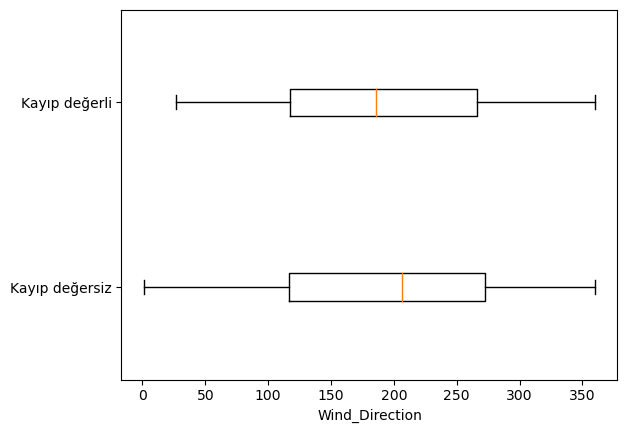

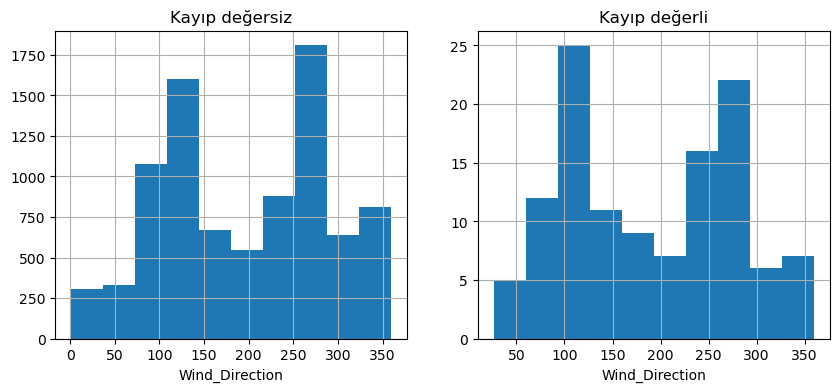

t testi için p-değeri: 0.39869195396670654 olarak bulunur
- - - - - - - - - - - - ************************* - - - - - - - - - - - 


In [ ]:
numerical_attributes = ['Temperature', 'Humidity', 'Wind_Speed', 'Wind_Direction']

BM_KD = hava.NO2_Location_A.isna()
for att in numerical_attributes:
    print('{} için Kayıp değerleri teşhis etme :'.format(att))
    Diagnose_MV_Numerical(hava,att,BM_KD)
    print('- - - - - - - - - - - - ************************* - - - - - - - - - - - ')

#### Hafta içi günlere göre eksik değerleri teşhis etme
Hava veri kümesinin weekday adlı kategorik bir özniteliğe sahip olmadığı ve haklı olacağınız, ancak hava veri setini açtığınız konusunda kafanız karışabilir.Datetime özniteliği bize şu öznitelikleri verebilir: hafta içi, gün, ay ve saat.

In [ ]:
hava.DateTime = pd.to_datetime(hava.DateTime)
hava['month'] = hava.DateTime.dt.month
hava['day'] = hava.DateTime.dt.day
hava['hour'] = hava.DateTime.dt.hour
hava['weekday'] = hava.DateTime.dt.day_name()

Önceki kodu çalıştırdıktan sonra ve okumaya devam etmeden önce, hava veri setinin  yeni durumunu kontrol edin ve ona eklenen yeni sütunları inceleyin. Ay, gün, saat ve hafta içi kategorik özniteliklerin kendi özniteliklerine eklendiğini göreceksiniz.

In [ ]:
hava

,DateTime,Temperature,Humidity,Wind_Speed,Wind_Direction,NO2_Location_A,NO2_Location_B,NO2_Location_C,month,day,hour,weekday
0,2020-01-01 00:00:00,2.180529,87,1.484318,75.963760,39.23,52.88,62.37,1,1,0,Wednesday
1,2020-01-01 01:00:00,1.490529,89,2.741678,113.198590,38.30,44.95,52.53,1,1,1,Wednesday
2,2020-01-01 02:00:00,1.690529,85,3.563818,135.000000,NaN,48.40,54.80,1,1,2,Wednesday
3,2020-01-01 03:00:00,1.430529,84,2.811690,129.805570,37.28,47.18,50.80,1,1,3,Wednesday
4,2020-01-01 04:00:00,0.840529,86,1.800000,126.869896,29.97,41.48,54.43,1,1,4,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2020-12-31 19:00:00,4.920528,72,4.553680,251.565060,53.44,32.65,66.82,12,31,19,Thursday
8780,2020-12-31 20:00:00,4.990529,74,3.259939,186.340200,49.80,34.03,67.31,12,31,20,Thursday
8781,2020-12-31 21:00:00,4.360529,84,10.587917,252.181120,43.32,25.55,59.33,12,31,21,Thursday
8782,2020-12-31 22:00:00,3.820528,88,8.435069,219.805570,39.88,19.90,43.70,12,31,22,Thursday


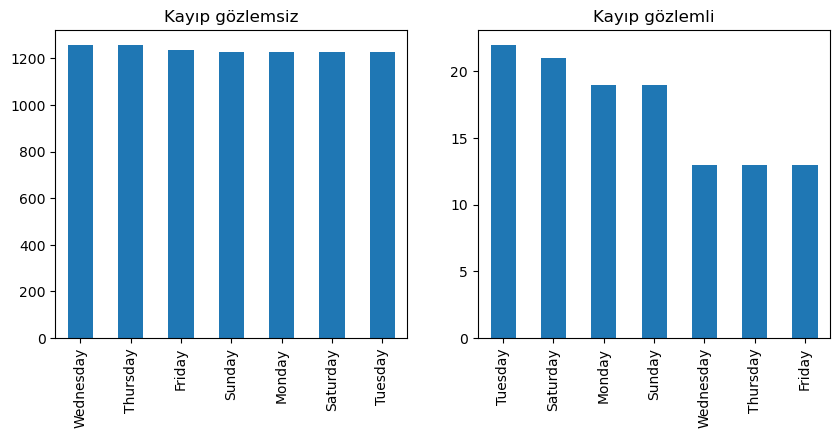

In [ ]:
BM_KD = hava.NO2_Location_A.isna()
etiket = ['Kayıp gözlemsiz','Kayıp gözlemli']

plt.figure(figsize=(10,4))
for i,mac in enumerate(BM_KD.unique()):
    plt.subplot(1,2,i+1)
    BM = BM_KD == mac
    hava[BM].weekday.value_counts().plot.bar()
    plt.title(etiket[i])
plt.show()

Önceki ekran görüntüsüne baktığımızda, eksik değerlerin rastgele gerçekleşmiş olabileceğini görebiliyoruz ve hafta içi hava değerinin değişmesi nedeniyle eksik değerlerin sistematik bir nedeni olduğuna inanmak için anlamlı bir eğilimimiz yok.

Ki-kare bağımsızlık testi istatistiksel testi kullanarak da benzer bir tanı koyabiliriz. Kısacası ve bu durum için bu test, eksik değerlerin ortaya çıkması ile hafta içi özniteliği arasında bir ilişki olmadığını varsaymaktadır. Bu hipoteze dayanarak test, hipotez doğruysa elimizdeki verilerin gerçekleşme olasılığı olan bir p değeri hesaplar. Bu p değerini kullanarak, eksik değerlerin sistematik bir nedeninden şüphelenecek herhangi bir kanıtımız olup olmadığına karar verebiliriz

In [ ]:
from scipy.stats import chi2_contingency
BM_KD = hava.NO2_Location_A.isna()
kontenjans_tablo = pd.crosstab(BM_KD,hava.weekday)
kontenjans_tablo

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
NO2_Location_A,,,,,,,
False,1235,1229,1227,1229,1259,1226,1259
True,13,19,21,19,13,22,13


In [ ]:
chi2_contingency(kontenjans_tablo)

Chi2ContingencyResult(statistic=6.048964133655503, pvalue=0.41772751510388023, dof=6, expected_freq=array([[1230.95081967, 1230.95081967, 1230.95081967, 1230.95081967,
        1254.62295082, 1230.95081967, 1254.62295082],
       [  17.04918033,   17.04918033,   17.04918033,   17.04918033,
          17.37704918,   17.04918033,   17.37704918]]))

0.4127 p değerine sahip olmak, grafiğe bakarak yaptığımız gözlemi doğrulamaktadır; bu, hava.NO2_LOCATION_A'da eksik değerlerin ortaya çıkması ile hafta içi değeri arasında bir ilişki olmadığı ve eksik değerlerin olduğu gibi olması gerçeğidir. 

#### Eksik değerleri tüm kategorik özniteliklere göre belirleme:

In [ ]:
from scipy.stats import chi2_contingency
def Kategorik_KD_belirleme(df,str_att_name,BM_KD):
    etiket = {True:'Kayıp değerli',False:'Kayıp değersiz'}

    plt.figure(figsize=(10,4))
    for i,mac in enumerate(BM_KD.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_KD == mac
        df[BM][str_att_name].value_counts().plot.bar()
        plt.title(etiket[mac])
    plt.show()

    kontenjans_tablo = pd.crosstab(BM_KD,df[str_att_name])   
    p_değeri = chi2_contingency(kontenjans_tablo)[1]
    
    print('Ki_kare testi için p-değeri: {}'.format(p_değeri))

 month İÇİN KAYIP DEĞER BELİRLEME ANALİZİ:


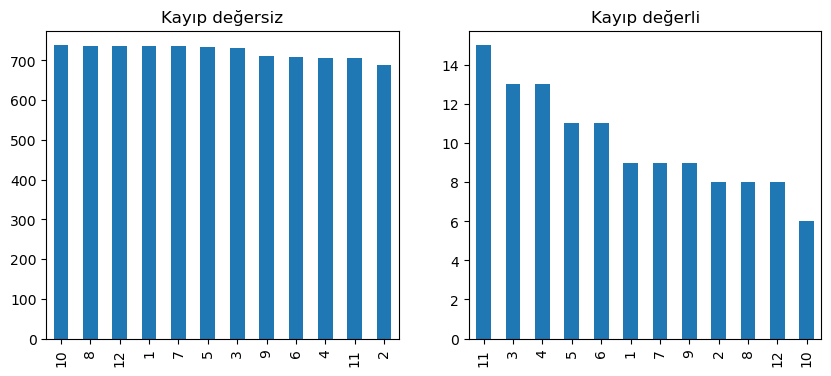

Ki_kare testi için p-değeri: 0.7096565832929861
- - - - - - - - - - - - xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx- - - - - - - - - - - 
 day İÇİN KAYIP DEĞER BELİRLEME ANALİZİ:


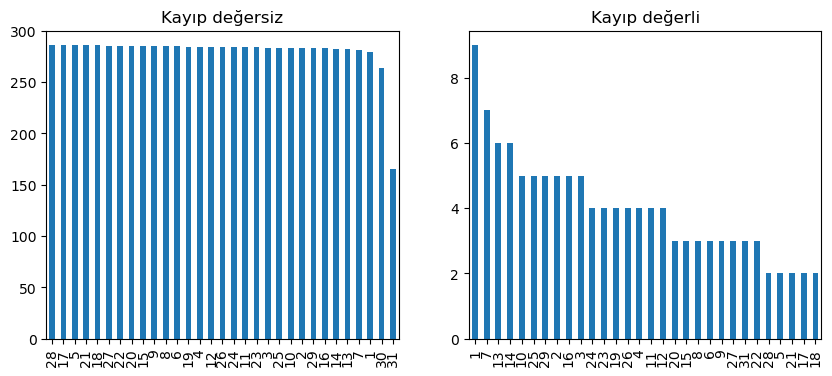

Ki_kare testi için p-değeri: 0.8040640724986007
- - - - - - - - - - - - xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx- - - - - - - - - - - 
 hour İÇİN KAYIP DEĞER BELİRLEME ANALİZİ:


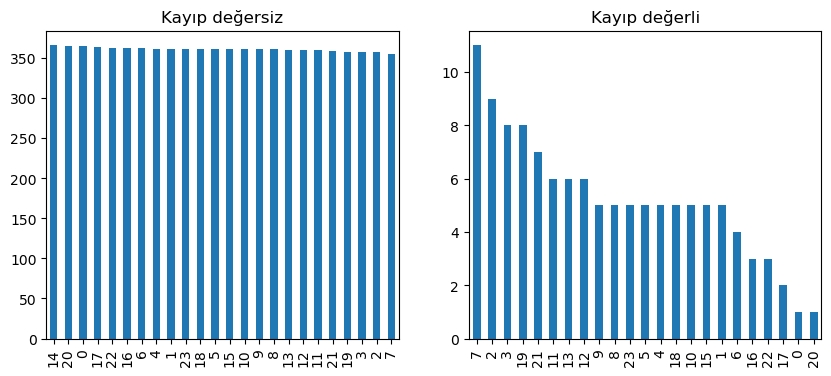

Ki_kare testi için p-değeri: 0.12725321642668141
- - - - - - - - - - - - xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx- - - - - - - - - - - 
 weekday İÇİN KAYIP DEĞER BELİRLEME ANALİZİ:


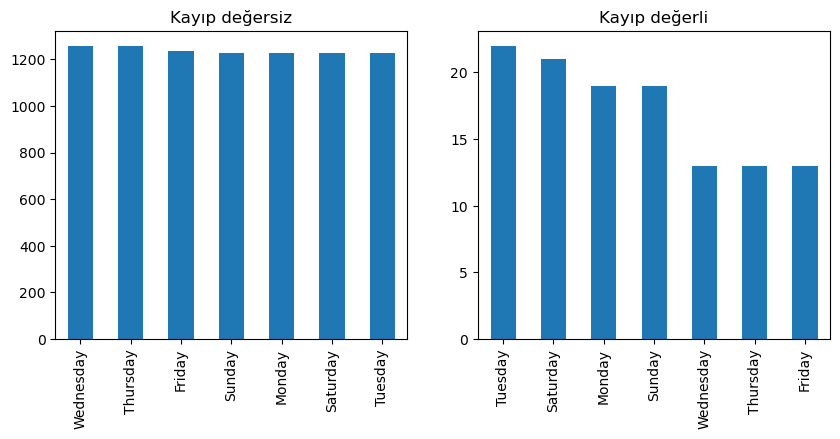

Ki_kare testi için p-değeri: 0.41772751510388023
- - - - - - - - - - - - xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx- - - - - - - - - - - 


In [ ]:
kategorik_değerler= ['month', 'day','hour', 'weekday']

BM_KD= hava.NO2_Location_A.isna()
for deger in kategorik_değerler:
    print(' {} İÇİN KAYIP DEĞER BELİRLEME ANALİZİ:'.format(deger))
    Kategorik_KD_belirleme(hava,deger,BM_KD)
    print('- - - - - - - - - - - - xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx- - - - - - - - - - - ')

### Diagnosing the missing values in NO2_Location_B

Temperature için kayıp değer analizi:


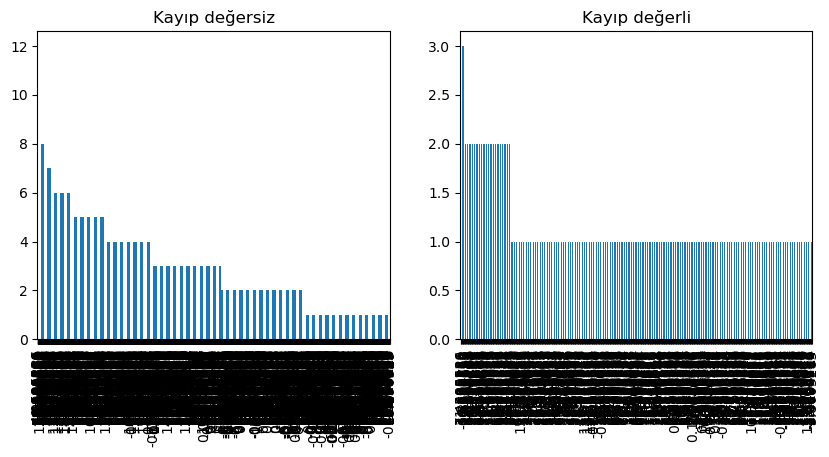

Ki_kare testi için p-değeri: 0.1559632981711297
- - - - - - - - - - - - ******** - - - - - - - - - - - 
Humidity için kayıp değer analizi:


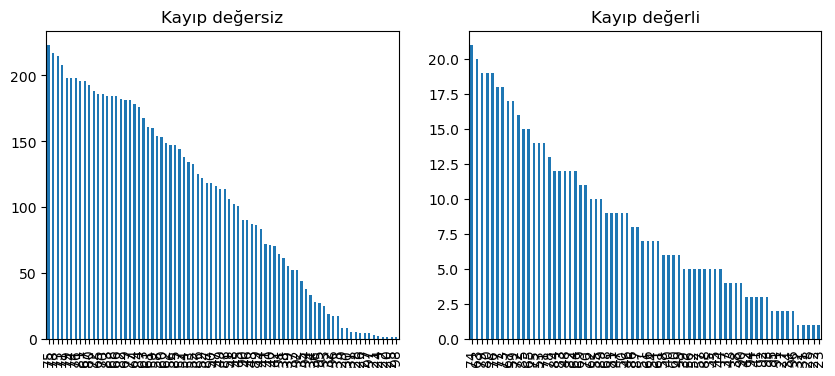

Ki_kare testi için p-değeri: 0.09899068144922099
- - - - - - - - - - - - ******** - - - - - - - - - - - 
Wind_Speed için kayıp değer analizi:


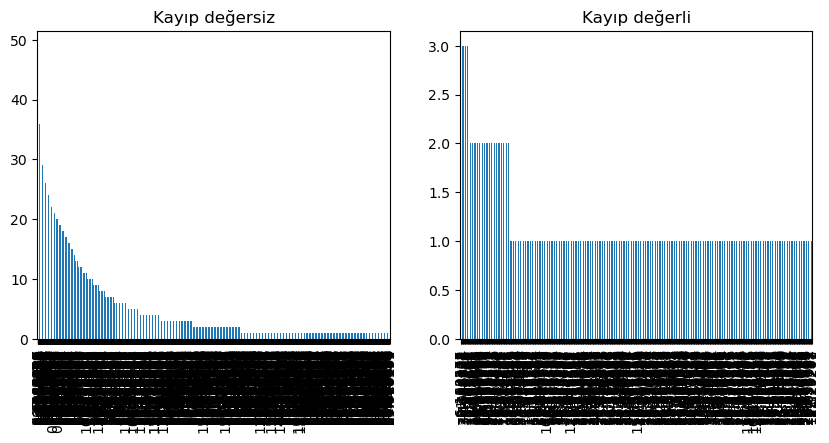

Ki_kare testi için p-değeri: 5.051923576895156e-96
- - - - - - - - - - - - ******** - - - - - - - - - - - 
Wind_Direction için kayıp değer analizi:


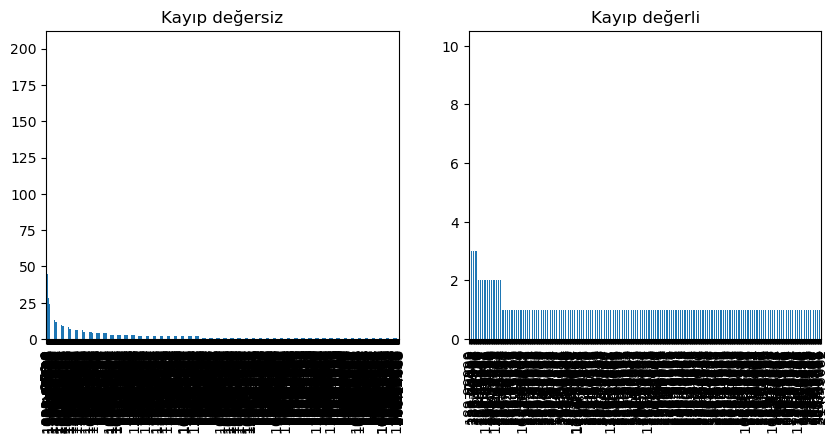

Ki_kare testi için p-değeri: 1.0490659808359491e-55
- - - - - - - - - - - - ******** - - - - - - - - - - - 
 Wind_Direction için kayıp değer analizi:


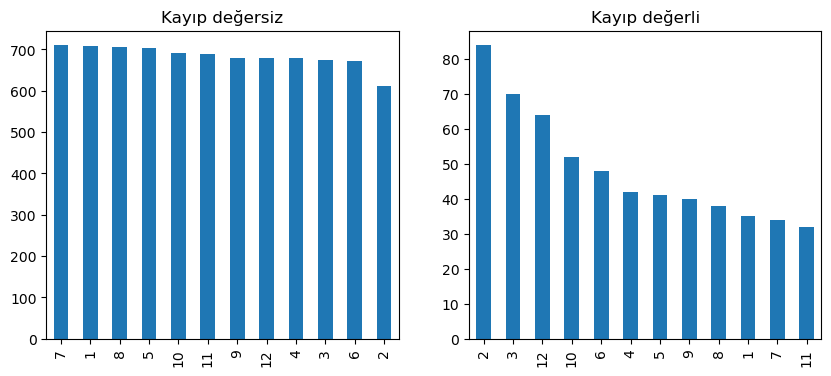

Ki_kare testi için p-değeri: 1.8048364819875927e-10
- - - - - - - - - - - - ********************- - - - - - - - - - - 
 Wind_Direction için kayıp değer analizi:


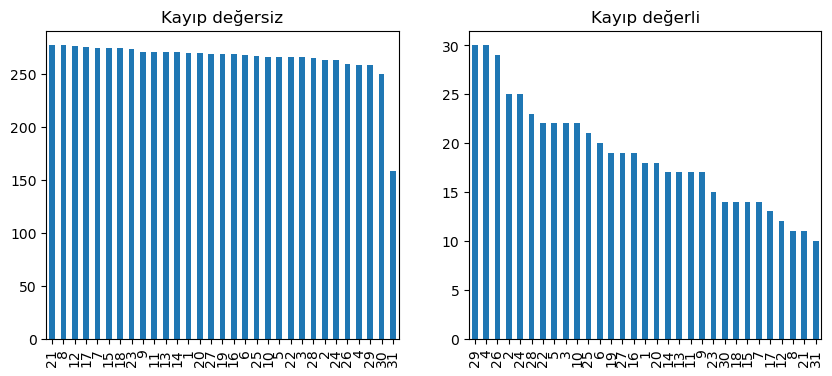

Ki_kare testi için p-değeri: 0.034816691411564224
- - - - - - - - - - - - ********************- - - - - - - - - - - 
 Wind_Direction için kayıp değer analizi:


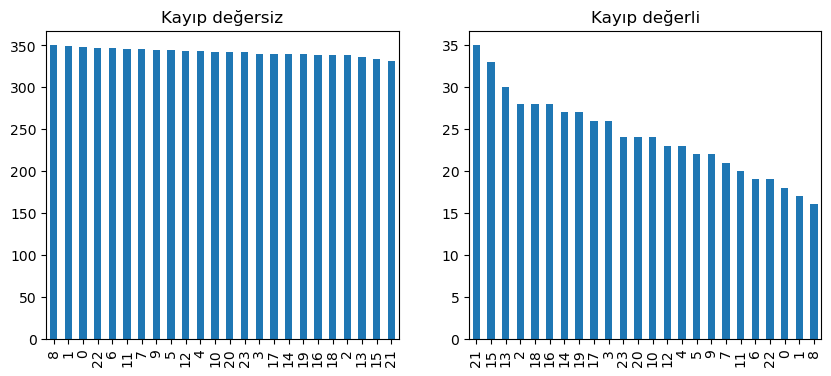

Ki_kare testi için p-değeri: 0.3949474320151337
- - - - - - - - - - - - ********************- - - - - - - - - - - 
 Wind_Direction için kayıp değer analizi:


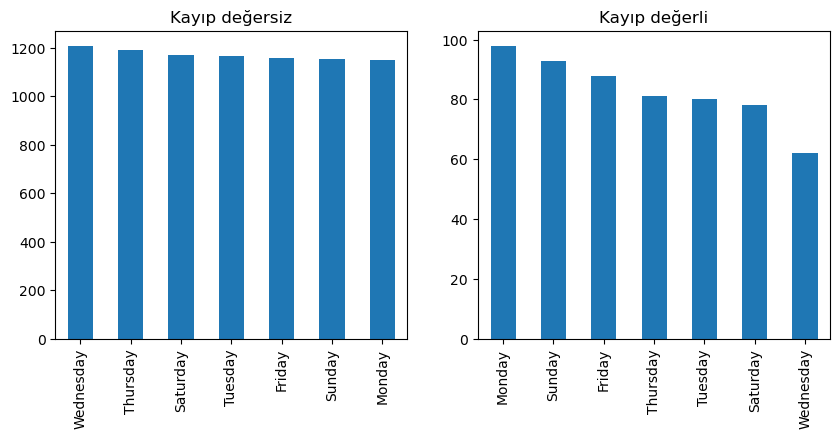

Ki_kare testi için p-değeri: 0.07073083108612685
- - - - - - - - - - - - ********************- - - - - - - - - - - 


In [ ]:
kategorik_degerler = ['month', 'day','hour', 'weekday']
numerik_degerler = ['Temperature', 'Humidity', 'Wind_Speed', 'Wind_Direction']

BM_KD = hava.NO2_Location_B.isna()
for deger in numerik_degerler:
    print('{} için kayıp değer analizi:'.format(deger))
    Kategorik_KD_belirleme(hava,deger,BM_KD)
    print('- - - - - - - - - - - - ******** - - - - - - - - - - - ')

for deger in kategorik_değerler:
    print(' {} için kayıp değer analizi:'.format(att))
    Kategorik_KD_belirleme(hava,deger,BM_KD)
    print('- - - - - - - - - - - - ********************- - - - - - - - - - - ')

### NO2_Location_C İÇİN KAYIP DEĞER ANALİZİ

 Temperature için kayıp değer analizi:


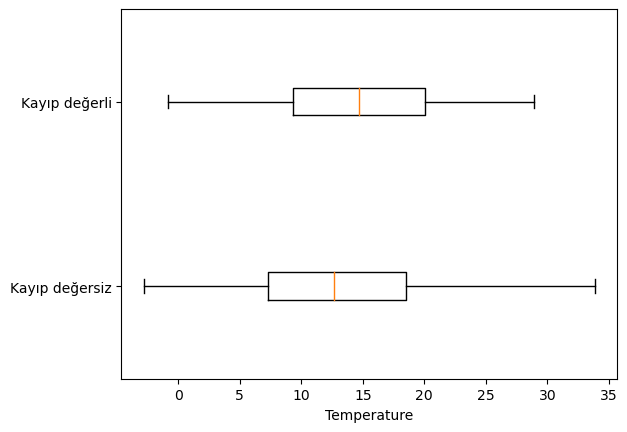

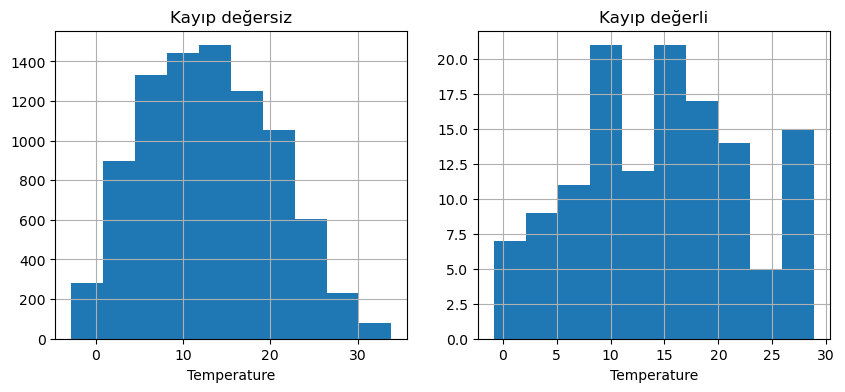

t testi için p-değeri: 0.01981913552818646 olarak bulunur
- - - - - - - - - **************************** - -  - - - - - - 
 Humidity için kayıp değer analizi:


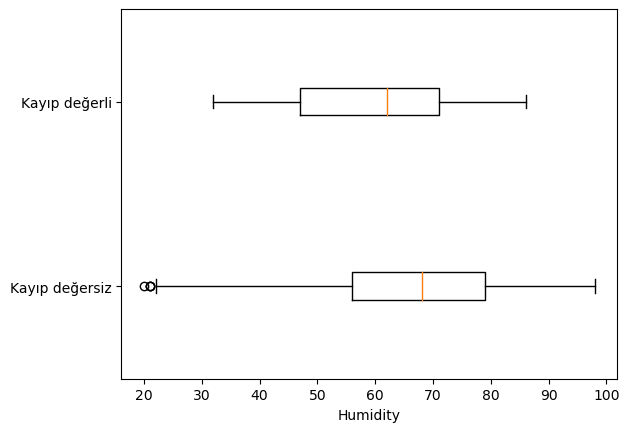

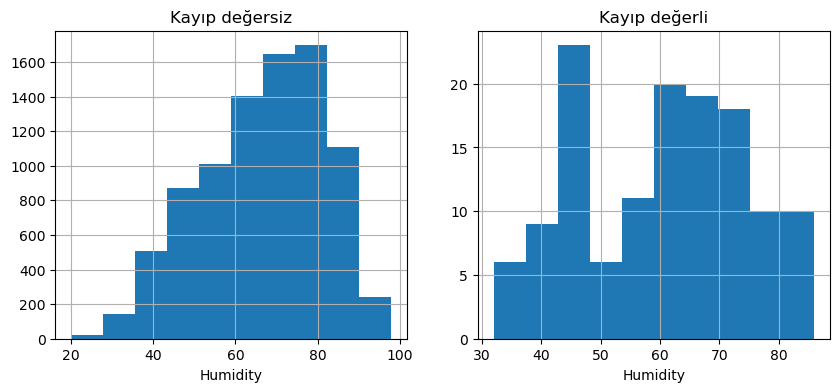

t testi için p-değeri: 8.179400599849167e-07 olarak bulunur
- - - - - - - - - **************************** - -  - - - - - - 
 Wind_Speed için kayıp değer analizi:


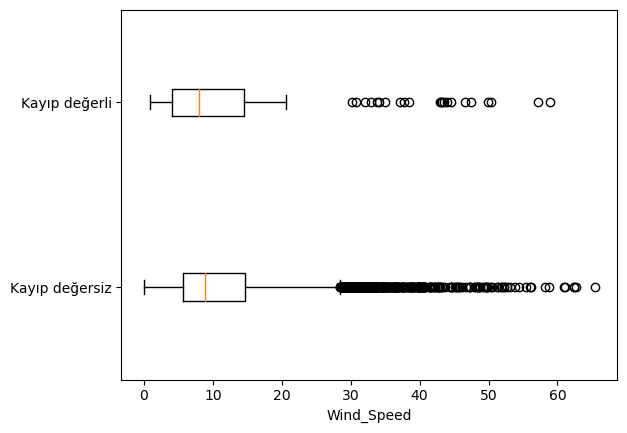

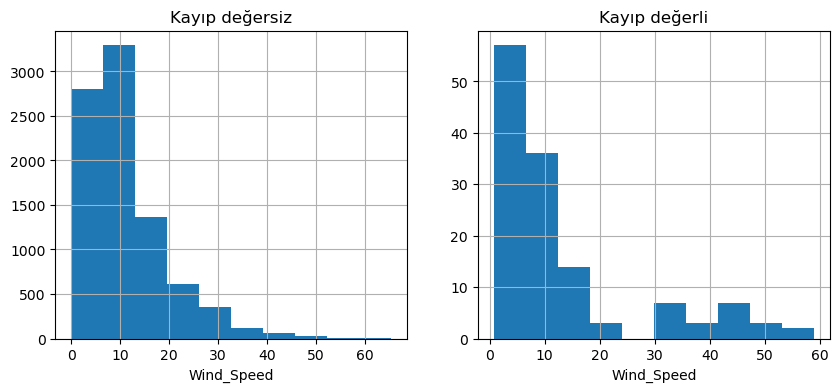

t testi için p-değeri: 0.01359796253829262 olarak bulunur
- - - - - - - - - **************************** - -  - - - - - - 
 Wind_Direction için kayıp değer analizi:


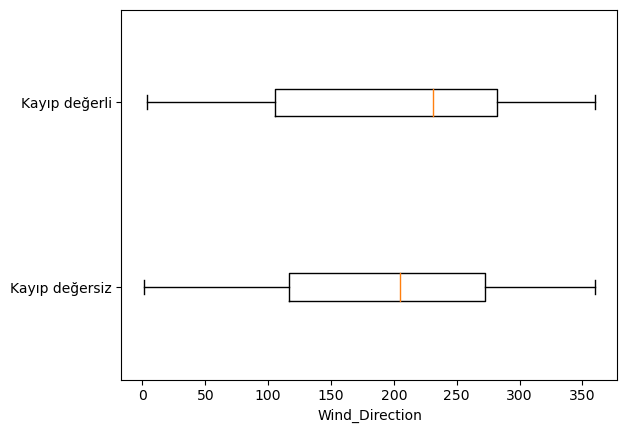

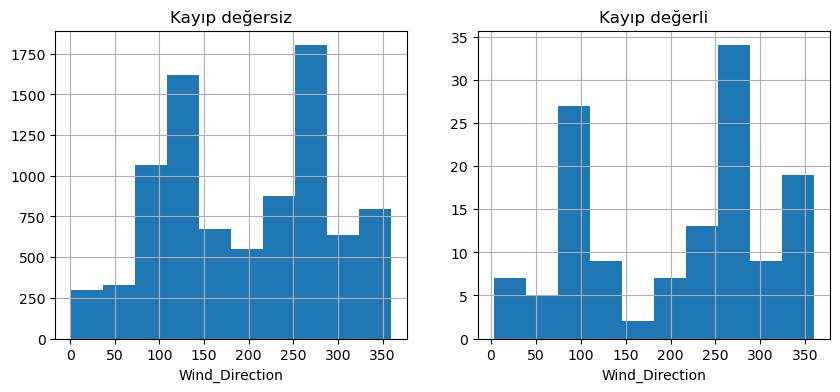

t testi için p-değeri: 0.3083081973623661 olarak bulunur
- - - - - - - - - **************************** - -  - - - - - - 
Wind_Direction için kayıp değer analizi:


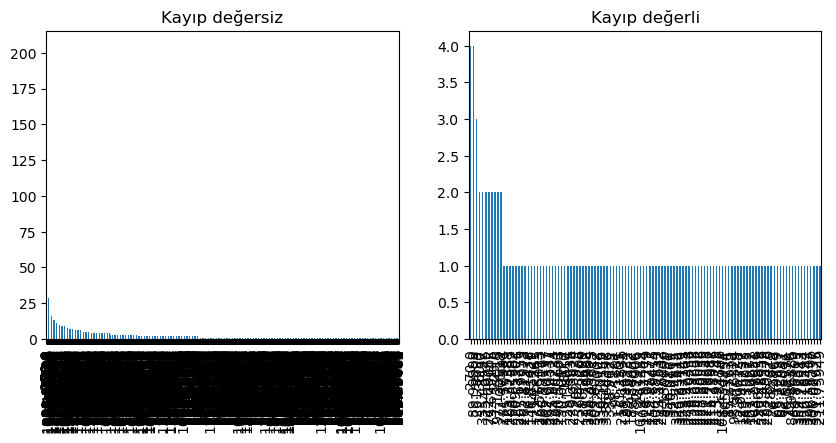

Ki_kare testi için p-değeri: 6.705824845591637e-10
- - - - - - - - - ******************************** - - - - - - - - - 
Wind_Direction için kayıp değer analizi:


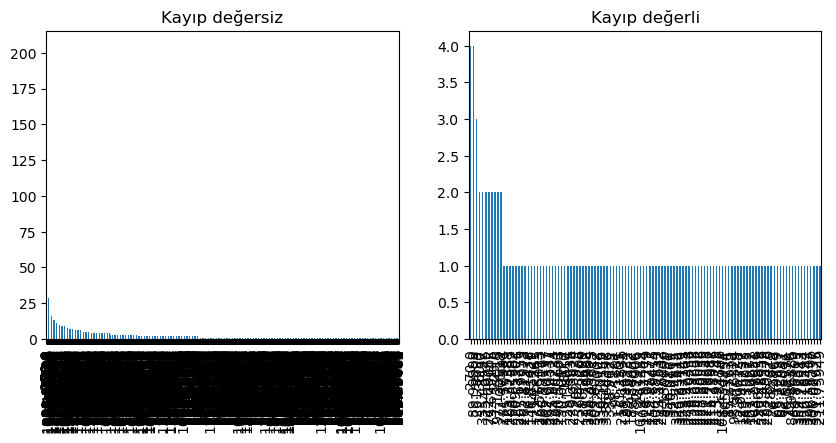

Ki_kare testi için p-değeri: 6.705824845591637e-10
- - - - - - - - - ******************************** - - - - - - - - - 
Wind_Direction için kayıp değer analizi:


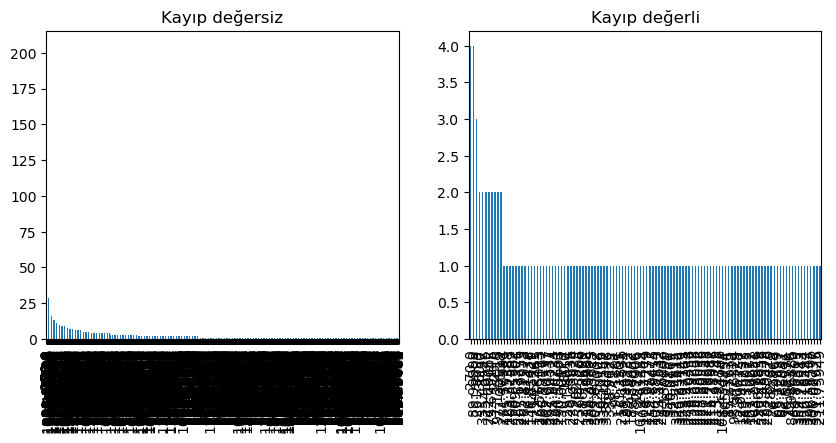

Ki_kare testi için p-değeri: 6.705824845591637e-10
- - - - - - - - - ******************************** - - - - - - - - - 
Wind_Direction için kayıp değer analizi:


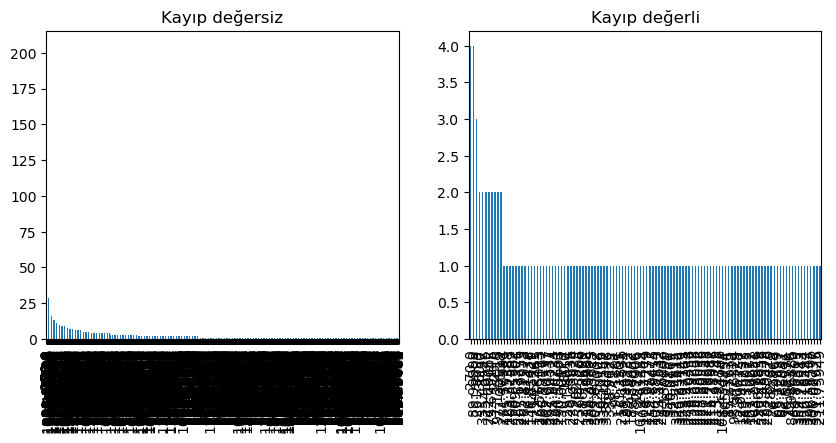

Ki_kare testi için p-değeri: 6.705824845591637e-10
- - - - - - - - - ******************************** - - - - - - - - - 


In [ ]:
kat_deger = ['month', 'day','hour', 'weekday']
nüm_deger= ['Temperature', 'Humidity','Wind_Speed', 'Wind_Direction']
BM_KD = hava.NO2_Location_C.isna()
for deger in nüm_deger:
    print(' {} için kayıp değer analizi:'.format(deger))
    Diagnose_MV_Numerical(hava,deger,BM_KD)
    print('- - - - - - - - - **************************** - -  - - - - - - ')
for DEGER in  kat_deger:
    print('{} için kayıp değer analizi:'.format(att))
    Kategorik_KD_belirleme(hava,deger,BM_KD)
    print('- - - - - - - - - ******************************** - - - - - - - - - ')

#### KAYIP DEĞERLERİ ORTALAMA İLE İKAME ETME

In [ ]:
hava

,DateTime,Temperature,Humidity,Wind_Speed,Wind_Direction,NO2_Location_A,NO2_Location_B,NO2_Location_C,month,day,hour,weekday
0,2020-01-01 00:00:00,2.180529,87,1.484318,75.963760,39.23,52.88,62.37,1,1,0,Wednesday
1,2020-01-01 01:00:00,1.490529,89,2.741678,113.198590,38.30,44.95,52.53,1,1,1,Wednesday
2,2020-01-01 02:00:00,1.690529,85,3.563818,135.000000,NaN,48.40,54.80,1,1,2,Wednesday
3,2020-01-01 03:00:00,1.430529,84,2.811690,129.805570,37.28,47.18,50.80,1,1,3,Wednesday
4,2020-01-01 04:00:00,0.840529,86,1.800000,126.869896,29.97,41.48,54.43,1,1,4,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2020-12-31 19:00:00,4.920528,72,4.553680,251.565060,53.44,32.65,66.82,12,31,19,Thursday
8780,2020-12-31 20:00:00,4.990529,74,3.259939,186.340200,49.80,34.03,67.31,12,31,20,Thursday
8781,2020-12-31 21:00:00,4.360529,84,10.587917,252.181120,43.32,25.55,59.33,12,31,21,Thursday
8782,2020-12-31 22:00:00,3.820528,88,8.435069,219.805570,39.88,19.90,43.70,12,31,22,Thursday


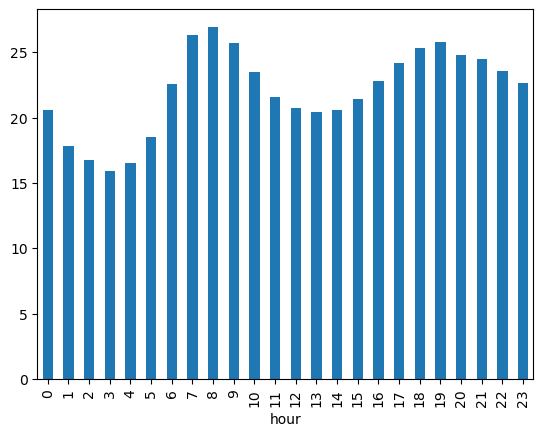

In [ ]:
hava.groupby('hour').NO2_Location_A.mean().plot.bar()
plt.show()

### Example 2 

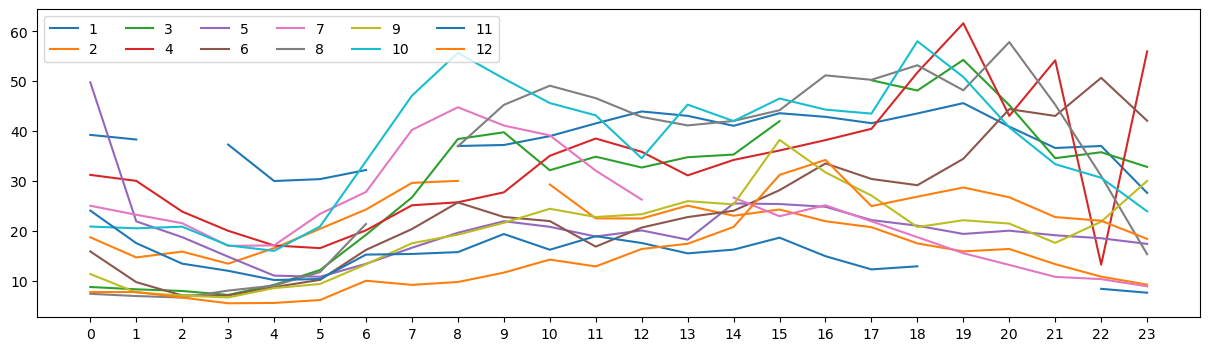

In [ ]:
ay = hava.month.unique()
saat = hava.hour.unique()
plt.figure(figsize=(15,4))

for mn in ay:
    BM = (hava.month == mn) & (hava.day ==1)
    wdf = hava[BM]
    plt.plot(wdf.NO2_Location_A.values,label=mn)
plt.legend(ncol=6)
plt.xticks(saat)
plt.show()

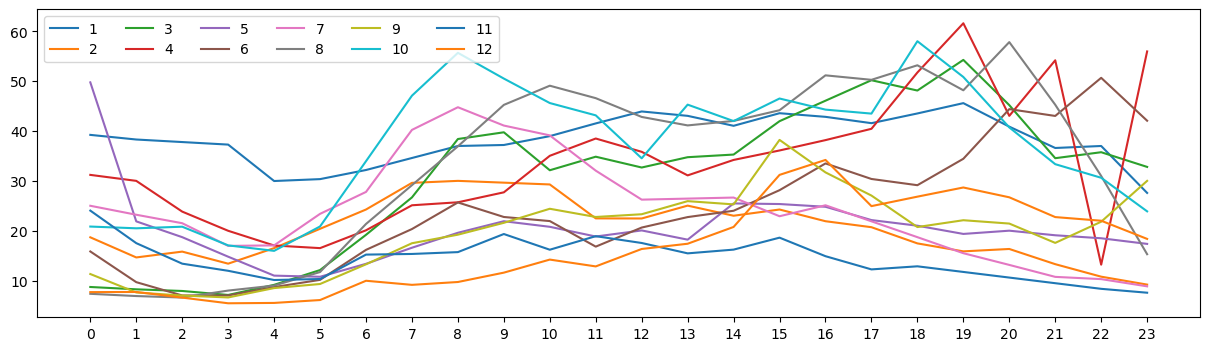

In [ ]:
NO2_Location_A_KDyok = hava.NO2_Location_A.interpolate(method='linear')

ay = hava.month.unique()
saat = hava.hour.unique()
plt.figure(figsize=(15,4))

for mn in ay:
    BM = (hava.month == mn) & (hava.day ==1)
    plt.plot(NO2_Location_A_KDyok[BM].values,label=mn)
plt.legend(ncol=6)
plt.xticks(saat)
plt.show()

interpolate(method='linear') yöntemi kullanılarak kayıp değer ikamesi yapıldı

# ÖRNEK 3

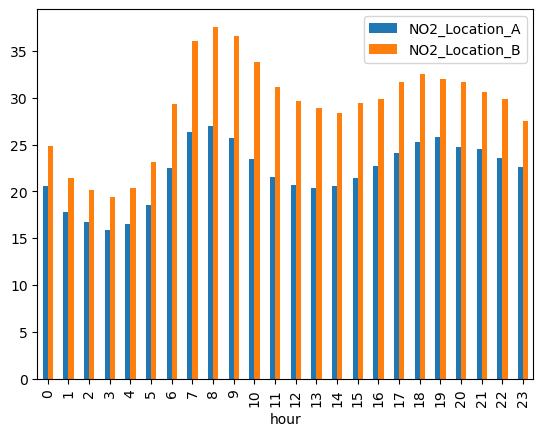

In [ ]:
hava.groupby('hour')[
    ['NO2_Location_A','NO2_Location_B']].mean().plot.bar()
plt.show()

### ÖRNEK 4

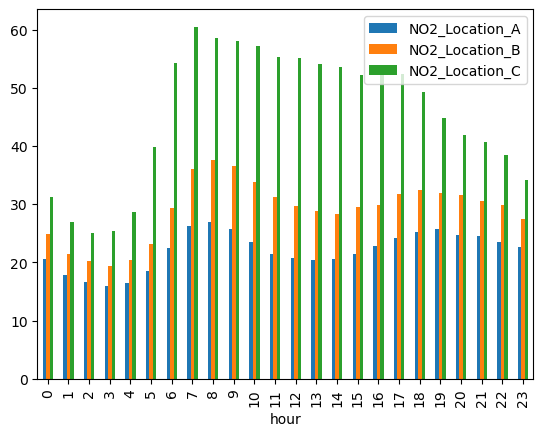

In [ ]:
hava.groupby('hour')[['NO2_Location_A','NO2_Location_B','NO2_Location_C']].mean().plot.bar()
plt.show()

### Example 5

In [ ]:
patient_df = pd.read_csv('kidney_disease.csv')

In [ ]:
print('Number of missing values:')
for col in patient_df.columns:
    n_MV = sum(patient_df[col].isna())
    print('{}:{}'.format(col,n_MV))

Number of missing values:
rc:131
sc:17
pcv:71
sg:47
hemo:52
diagnosis:0


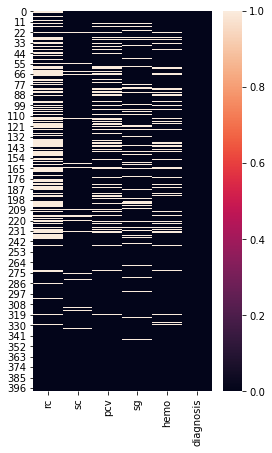

In [ ]:
patient_df = pd.read_csv('kidney_disease.csv')
plt.figure(figsize=(4,7))
sns.heatmap(patient_df.isna())
plt.show()

Diagnosis Analysis for sc:


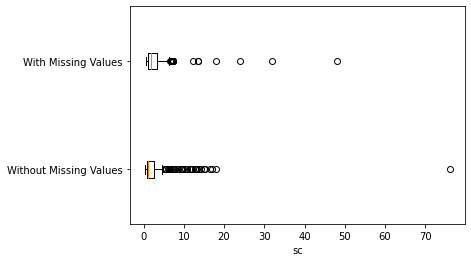

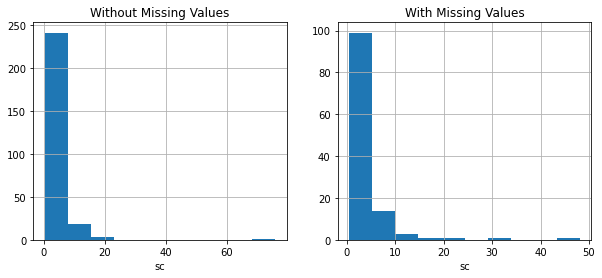

p-value of t-test: 0.18583257224831443
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for pcv:


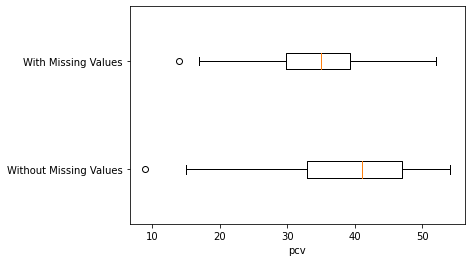

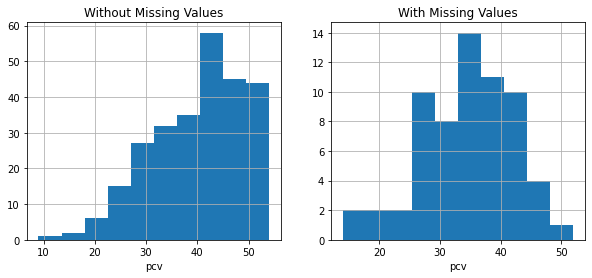

p-value of t-test: 1.552273251165168e-05
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for sg:


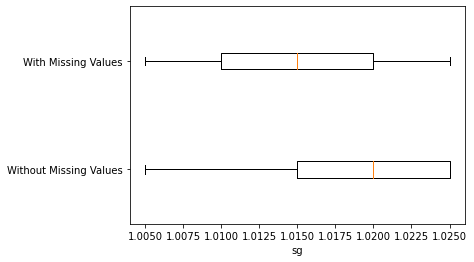

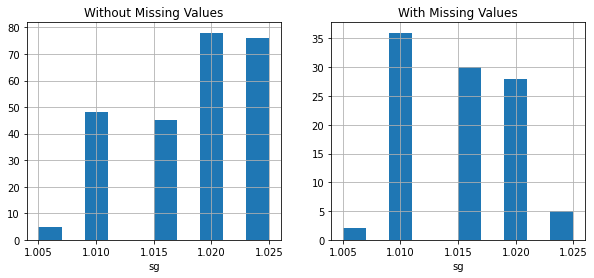

p-value of t-test: 1.0955628827436889e-07
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for hemo:


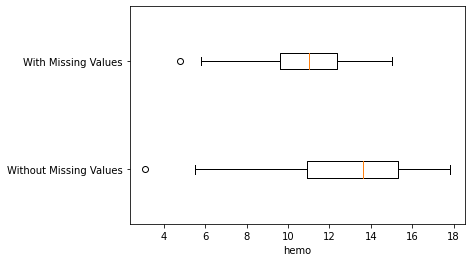

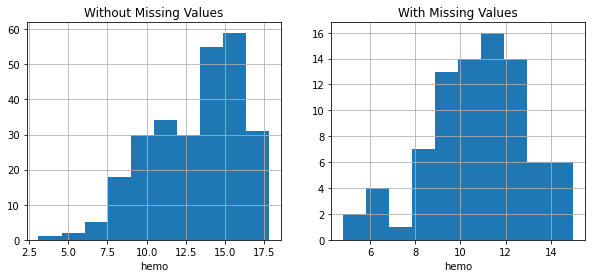

p-value of t-test: 2.976362646602022e-10
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for diagnosis:


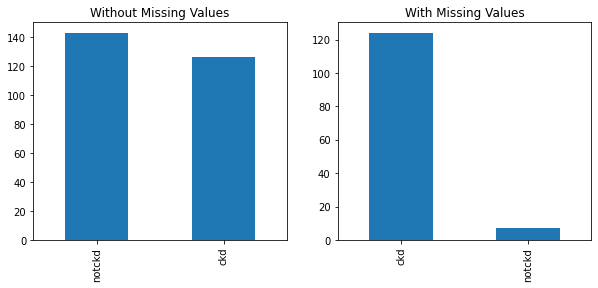

p-value of Chi_squared test: 5.168131718514657e-20
- - - - - - - - - divider - - - - - - - - - 


In [ ]:
categorical_attributes = ['diagnosis']
numerical_attributes = ['sc','pcv','sg','hemo']

BM_MV = patient_df.rc.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Numerical(patient_df,att,BM_MV)
    print('- - - - - - - - - divider - -  - - - - - - ')
for att in categorical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Categorical(patient_df,att,BM_MV)
    print('- - - - - - - - - divider - - - - - - - - - ')

Diagnosis Analysis for rc:


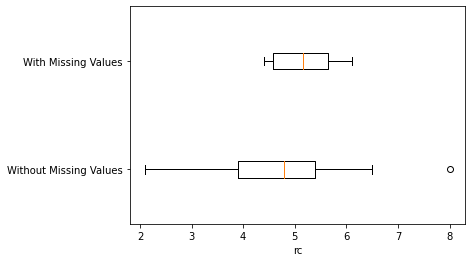

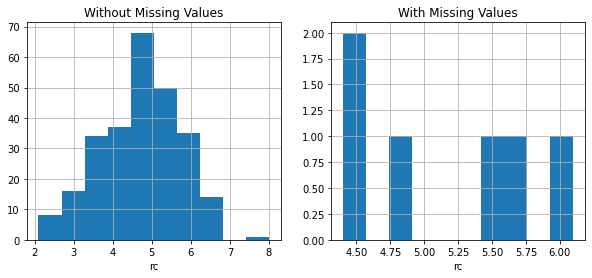

p-value of t-test: 0.2679867109793845
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for pcv:


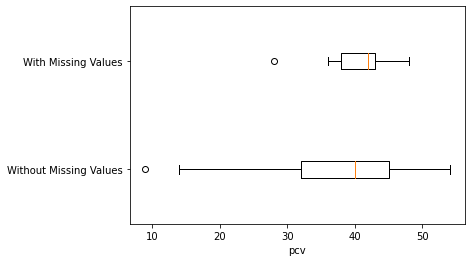

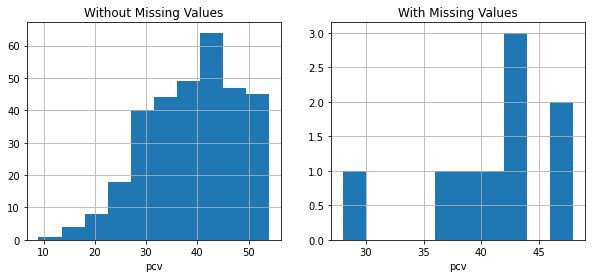

p-value of t-test: 0.5225987625338995
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for sg:


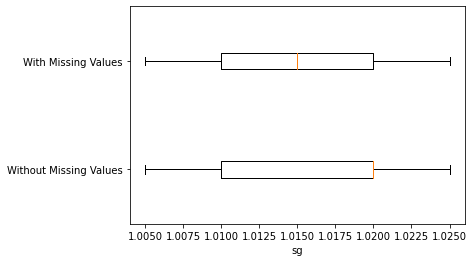

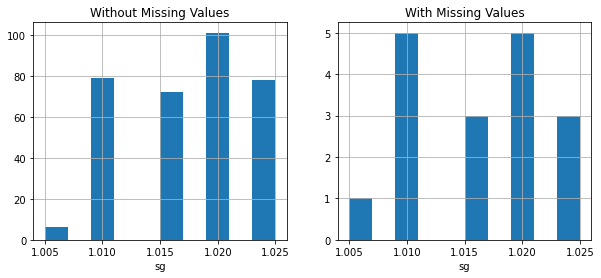

p-value of t-test: 0.363362432134856
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for hemo:


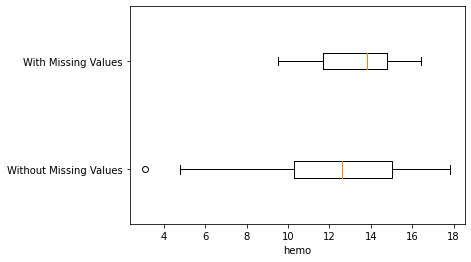

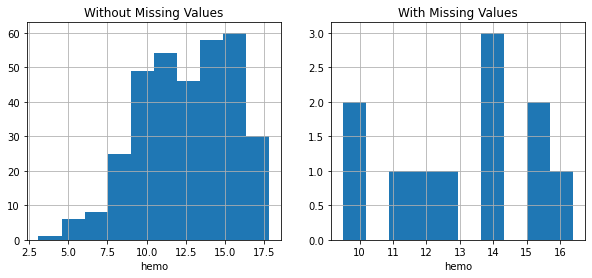

p-value of t-test: 0.4681304996025132
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for diagnosis:


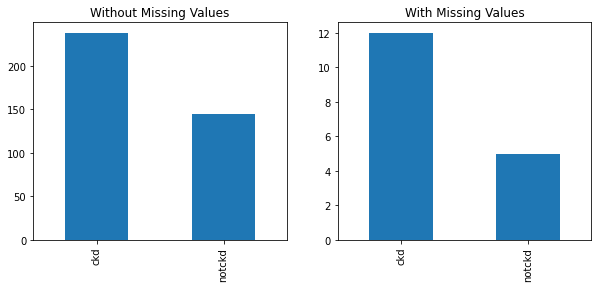

p-value of Chi_squared test: 0.6541676805409404
- - - - - - - - - divider - - - - - - - - - 


In [ ]:
categorical_attributes = ['diagnosis']
numerical_attributes = ['rc','pcv','sg','hemo']

BM_MV = patient_df.sc.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Numerical(patient_df,att,BM_MV)
    print('- - - - - - - - - divider - -  - - - - - - ')
for att in categorical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Categorical(patient_df,att,BM_MV)
    print('- - - - - - - - - divider - - - - - - - - - ')

Diagnosis Analysis for rc:


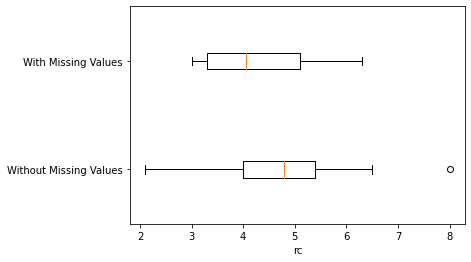

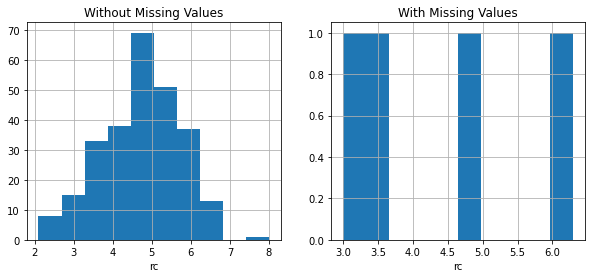

p-value of t-test: 0.48342077054892096
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for sc:


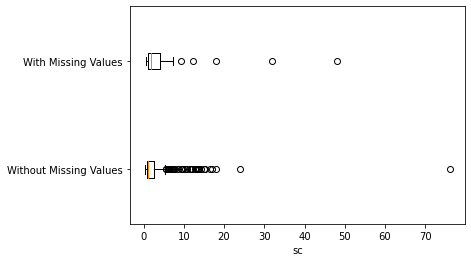

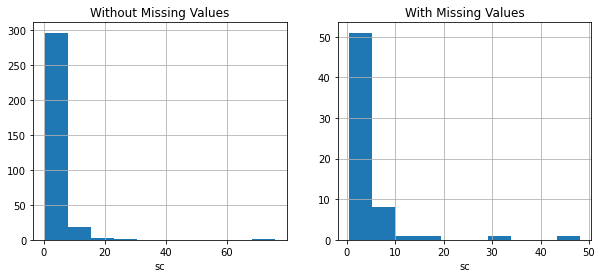

p-value of t-test: 0.0922517821596161
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for sg:


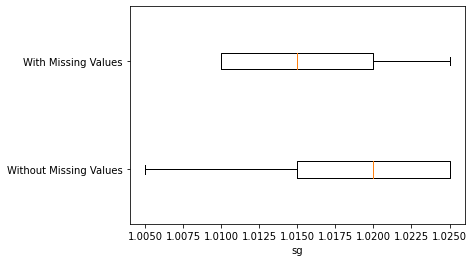

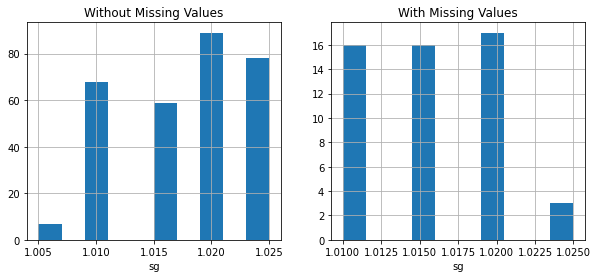

p-value of t-test: 0.01757923566523417
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for hemo:


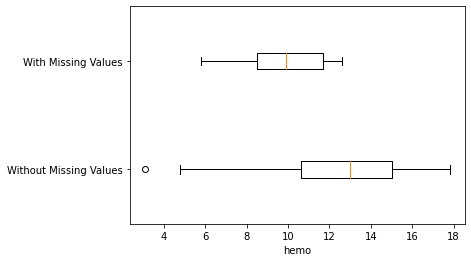

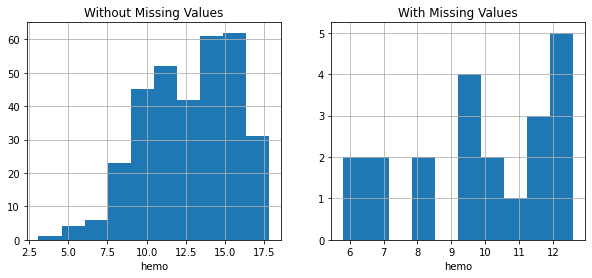

p-value of t-test: 1.5664018538667405e-05
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for diagnosis:


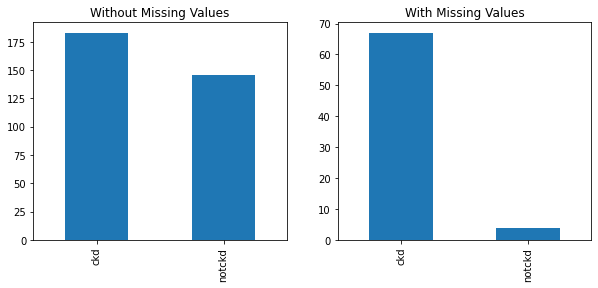

p-value of Chi_squared test: 2.2258514131489864e-09
- - - - - - - - - divider - - - - - - - - - 


In [ ]:
categorical_attributes = ['diagnosis']
numerical_attributes = ['rc','sc','sg','hemo']

BM_MV = patient_df.pcv.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Numerical(patient_df,att,BM_MV)
    print('- - - - - - - - - divider - -  - - - - - - ')
for att in categorical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Categorical(patient_df,att,BM_MV)
    print('- - - - - - - - - divider - - - - - - - - - ')

Diagnosis Analysis for rc:


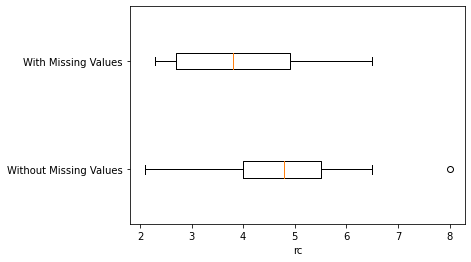

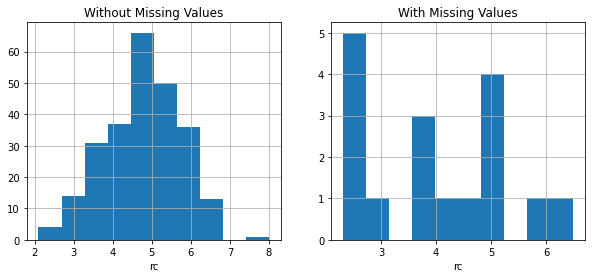

p-value of t-test: 0.00225068644343712
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for sc:


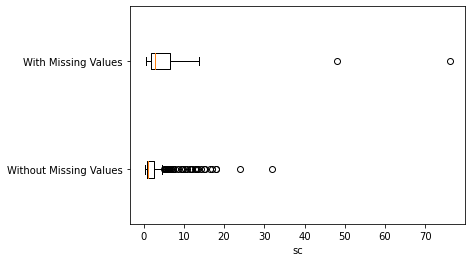

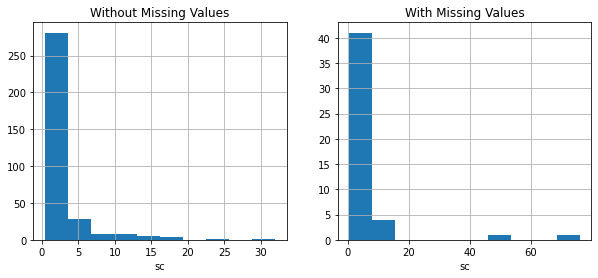

p-value of t-test: 7.153109526995942e-06
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for pcv:


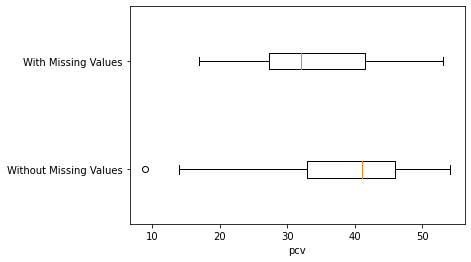

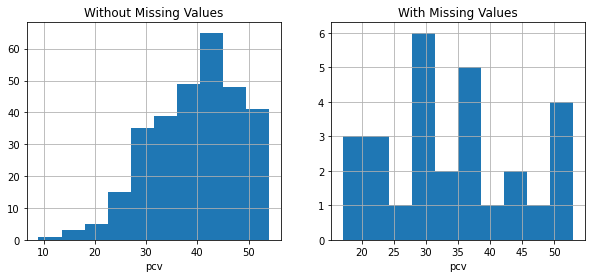

p-value of t-test: 0.0014894695918489607
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for hemo:


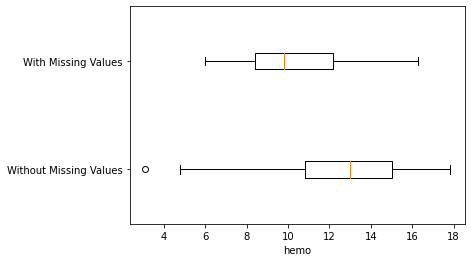

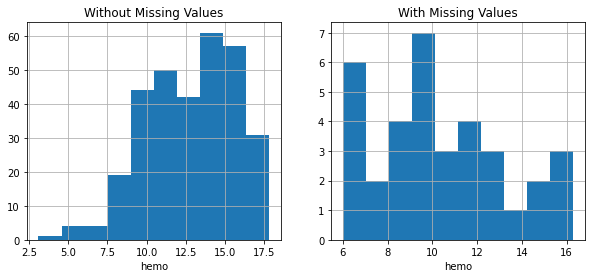

p-value of t-test: 2.7119421233597216e-06
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for diagnosis:


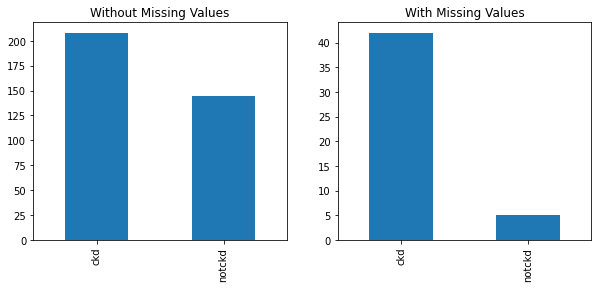

p-value of Chi_squared test: 0.00010072544367170718
- - - - - - - - - divider - - - - - - - - - 


In [ ]:
categorical_attributes = ['diagnosis']
numerical_attributes = ['rc','sc','pcv','hemo']

BM_MV = patient_df.sg.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Numerical(patient_df,att,BM_MV)
    print('- - - - - - - - - divider - -  - - - - - - ')
for att in categorical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Categorical(patient_df,att,BM_MV)
    print('- - - - - - - - - divider - - - - - - - - - ')

Diagnosis Analysis for rc:


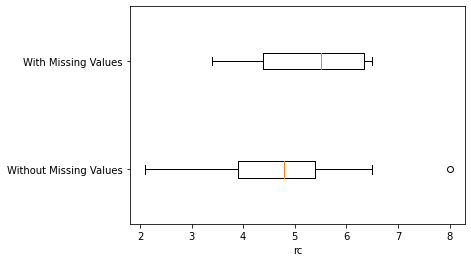

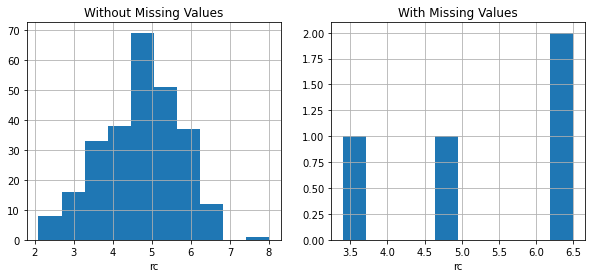

p-value of t-test: 0.30996898190520183
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for sc:


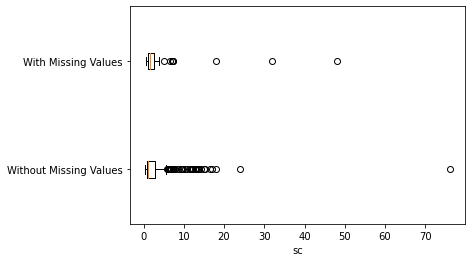

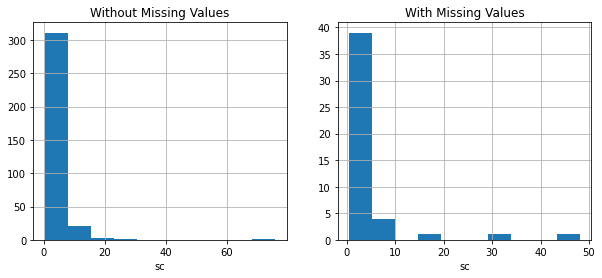

p-value of t-test: 0.17771862389361795
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for pcv:


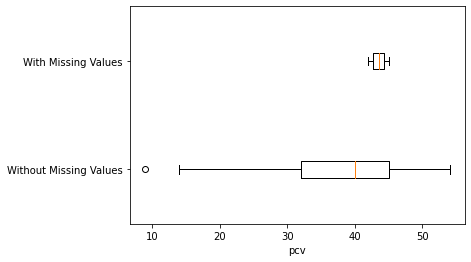

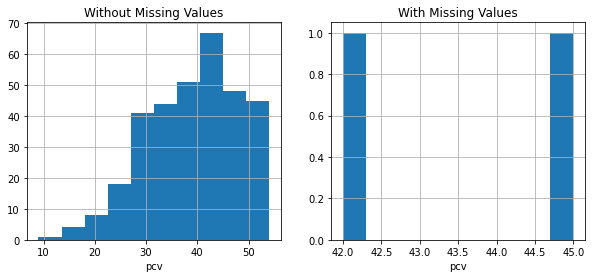

p-value of t-test: 0.46728803939148567
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for sg:


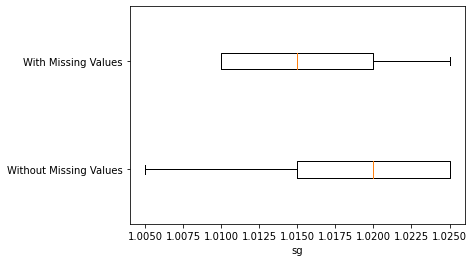

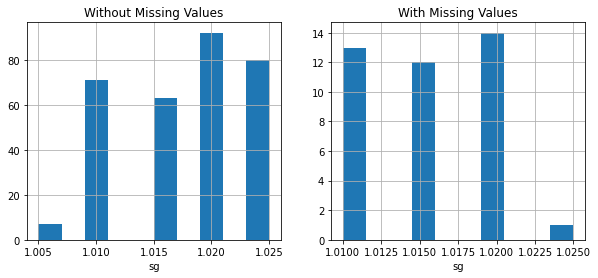

p-value of t-test: 0.016703395424493707
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for diagnosis:


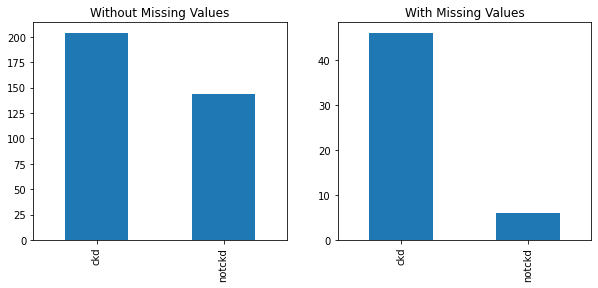

p-value of Chi_squared test: 6.542728784321527e-05
- - - - - - - - - divider - - - - - - - - - 


In [ ]:
categorical_attributes = ['diagnosis']
numerical_attributes = ['rc','sc','pcv','sg']

BM_MV = patient_df.hemo.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Numerical(patient_df,att,BM_MV)
    print('- - - - - - - - - divider - -  - - - - - - ')
for att in categorical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Categorical(patient_df,att,BM_MV)
    print('- - - - - - - - - divider - - - - - - - - - ')

In [ ]:
patient_df['rc_BMV'] = patient_df.rc.isna().astype(int)
patient_df['pcv_BMV'] = patient_df.pcv.isna().astype(int)
patient_df['sg_BMV'] = patient_df.sg.isna().astype(int)
patient_df['hemo_BMV'] = patient_df.hemo.isna().astype(int)

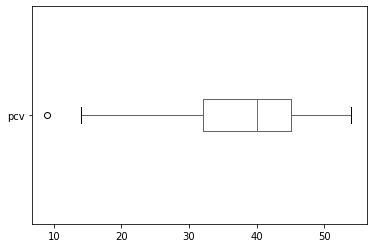

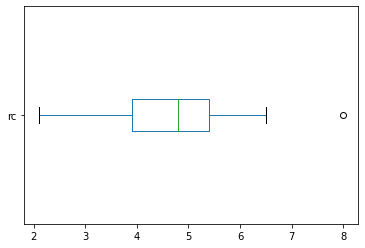

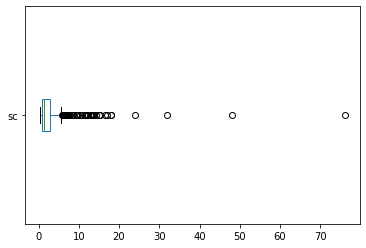

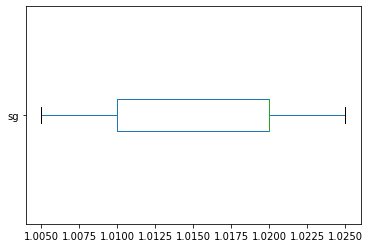

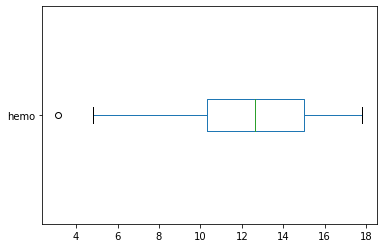

In [ ]:
numerical_attributes = ['pcv','rc','sc','sg','hemo']
for att in numerical_attributes:
    patient_df[att].plot.box(vert=False)
    plt.show()

In [ ]:
patient_df.sc.fillna(patient_df.sc.median(),inplace=True)
patient_df.fillna(patient_df.mean(),inplace=True)

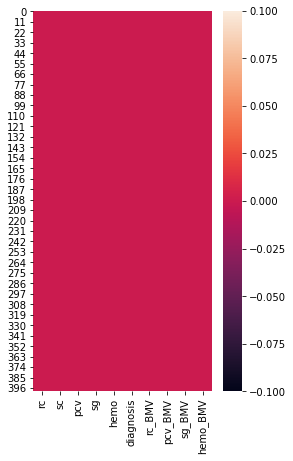

In [ ]:
plt.figure(figsize=(4,7))
sns.heatmap(patient_df.isna())
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
predictors = ['rc', 'sc', 'pcv', 'sg', 'hemo', 'rc_BMV', 'pcv_BMV', 'sg_BMV', 'hemo_BMV']
target = 'diagnosis'

Xs = patient_df[predictors]
y= patient_df[target]

classTree = DecisionTreeClassifier(min_impurity_decrease= 0.01, min_samples_split= 15)
classTree.fit(Xs, y)

DecisionTreeClassifier(min_impurity_decrease=0.01, min_samples_split=15)

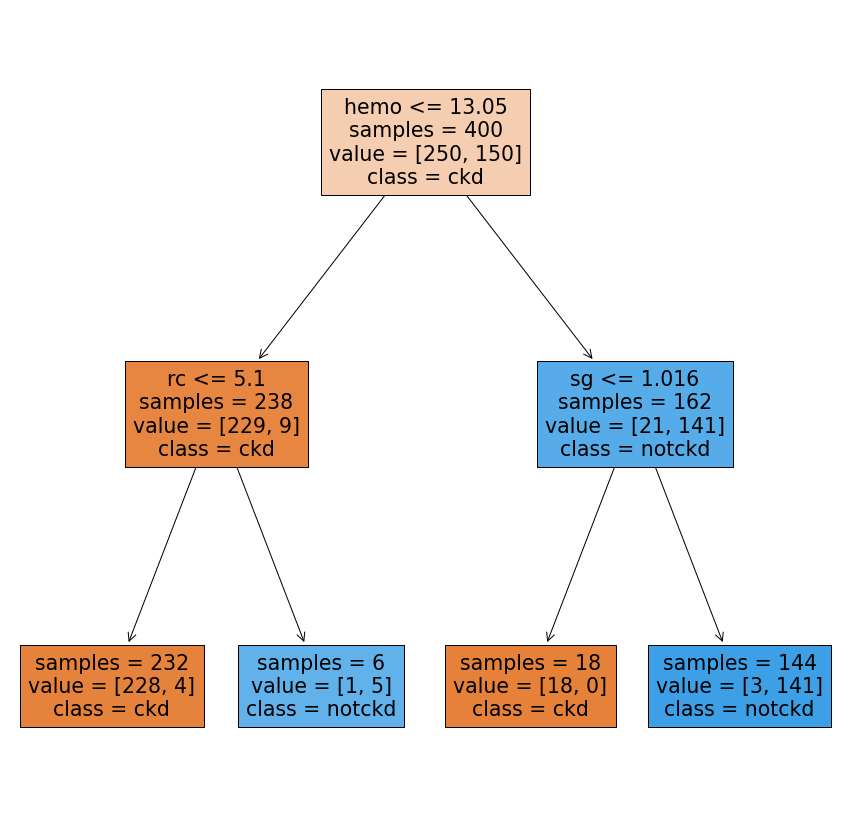

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
plot_tree(classTree, 
          feature_names=predictors,  
          class_names=y.unique(),
          filled=True,
          impurity=False)
plt.show()

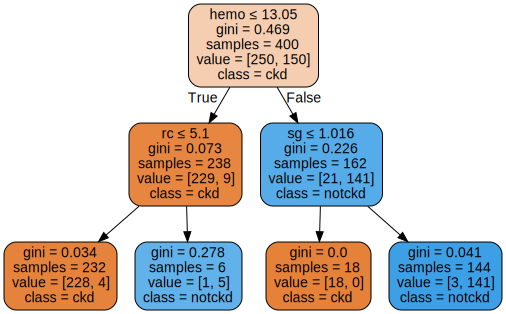

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(classTree, out_file=None, feature_names=Xs.columns,  
                           class_names=y.unique(), filled=True,
                           rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## Outliers 
### Detecting Outliers
#### Univariate Outlier detection

In [ ]:
column_df = pd.read_csv('columns.csv')
column_df.head(2)

,original,short
0,I enjoy listening to music.,Music
1,I prefer.,Slow songs or fast songs


In [ ]:
response_df = pd.read_csv('responses.csv')
response_df.head(2)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats


#### Example of detecting outliers across one numerical attribute

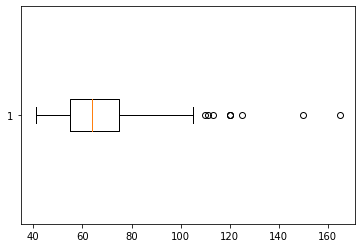

In [ ]:
fig = plt.boxplot(response_df.Weight.dropna(),vert=False)

In [ ]:
response_df[response_df.Weight>105] #105 ten büyük olanları al çünkü aykırı değerler orada başlıyor

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
292,5.0,4.0,5.0,2.0,3.0,2.0,5.0,5.0,4.0,1.0,...,21.0,184.0,120.0,1.0,female,right handed,secondary school,no,city,house/bungalow
612,5.0,3.0,5.0,1.0,1.0,3.0,2.0,3.0,4.0,3.0,...,23.0,172.0,110.0,2.0,male,right handed,secondary school,no,village,block of flats
715,4.0,3.0,2.0,3.0,3.0,3.0,4.0,2.0,5.0,5.0,...,29.0,183.0,111.0,1.0,male,left handed,secondary school,no,village,house/bungalow
793,2.0,3.0,3.0,1.0,2.0,3.0,3.0,3.0,2.0,4.0,...,24.0,185.0,120.0,2.0,male,right handed,doctorate degree,no,city,house/bungalow
796,3.0,5.0,3.0,2.0,2.0,4.0,3.0,5.0,1.0,4.0,...,27.0,189.0,113.0,3.0,male,left handed,doctorate degree,no,city,house/bungalow
859,5.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,3.0,2.0,...,20.0,190.0,125.0,1.0,male,right handed,secondary school,no,city,block of flats
885,3.0,4.0,3.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,...,23.0,NaN,165.0,0.0,female,right handed,secondary school,yes,city,house/bungalow
973,5.0,3.0,2.0,5.0,5.0,4.0,5.0,2.0,5.0,5.0,...,20.0,175.0,120.0,2.0,female,right handed,secondary school,no,city,block of flats
992,4.0,4.0,4.0,1.0,4.0,4.0,1.0,3.0,4.0,4.0,...,30.0,200.0,150.0,1.0,male,right handed,masters degree,no,city,block of flats


In [ ]:
print(fig)

{'whiskers': [<matplotlib.lines.Line2D object at 0x0000020F9E7773A0>, <matplotlib.lines.Line2D object at 0x0000020F9E296F10>], 'caps': [<matplotlib.lines.Line2D object at 0x0000020F9E296DF0>, <matplotlib.lines.Line2D object at 0x0000020F9E296490>], 'boxes': [<matplotlib.lines.Line2D object at 0x0000020F9E777A90>], 'medians': [<matplotlib.lines.Line2D object at 0x0000020F9E296820>], 'fliers': [<matplotlib.lines.Line2D object at 0x0000020F9E892F40>], 'means': []}


In [ ]:
fig['fliers'][0].get_data()

(array([120., 110., 111., 120., 113., 125., 165., 120., 150.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [ ]:
Q1 = response_df.Weight.quantile(0.25)
Q3 = response_df.Weight.quantile(0.75)
IQR = Q3-Q1 #3. çeyrek ve 1. çeyrek arasındaki fark

BM = (response_df.Weight > (Q3+1.5 *IQR)) | (response_df.Weight < (Q1-1.5 *IQR))
response_df[BM]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
292,5.0,4.0,5.0,2.0,3.0,2.0,5.0,5.0,4.0,1.0,...,21.0,184.0,120.0,1.0,female,right handed,secondary school,no,city,house/bungalow
612,5.0,3.0,5.0,1.0,1.0,3.0,2.0,3.0,4.0,3.0,...,23.0,172.0,110.0,2.0,male,right handed,secondary school,no,village,block of flats
715,4.0,3.0,2.0,3.0,3.0,3.0,4.0,2.0,5.0,5.0,...,29.0,183.0,111.0,1.0,male,left handed,secondary school,no,village,house/bungalow
793,2.0,3.0,3.0,1.0,2.0,3.0,3.0,3.0,2.0,4.0,...,24.0,185.0,120.0,2.0,male,right handed,doctorate degree,no,city,house/bungalow
796,3.0,5.0,3.0,2.0,2.0,4.0,3.0,5.0,1.0,4.0,...,27.0,189.0,113.0,3.0,male,left handed,doctorate degree,no,city,house/bungalow
859,5.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,3.0,2.0,...,20.0,190.0,125.0,1.0,male,right handed,secondary school,no,city,block of flats
885,3.0,4.0,3.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,...,23.0,NaN,165.0,0.0,female,right handed,secondary school,yes,city,house/bungalow
973,5.0,3.0,2.0,5.0,5.0,4.0,5.0,2.0,5.0,5.0,...,20.0,175.0,120.0,2.0,female,right handed,secondary school,no,city,block of flats
992,4.0,4.0,4.0,1.0,4.0,4.0,1.0,3.0,4.0,4.0,...,30.0,200.0,150.0,1.0,male,right handed,masters degree,no,city,block of flats


#### Example of detecting outliers across one categorical attribute

In [ ]:
response_df.Education.value_counts()

secondary school                    621
college/bachelor degree             212
masters degree                       81
primary school                       80
currently a primary school pupil     10
doctorate degree                      5
Name: Education, dtype: int64

<AxesSubplot:>

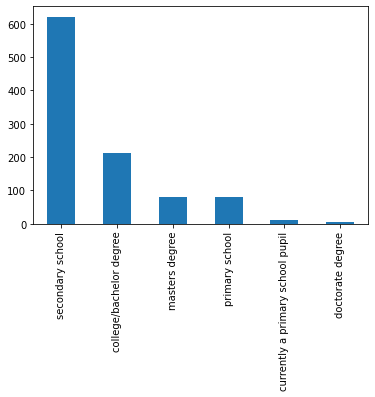

In [ ]:
response_df.Education.value_counts().plot.bar()

### Bivariate Outlier detection
#### Example of detecting outliers across two numerical attributes


<AxesSubplot:xlabel='Height', ylabel='Weight'>

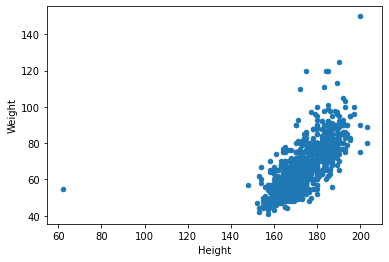

In [ ]:
response_df.plot.scatter(x='Height',y='Weight')

In [ ]:
BM = (response_df.Weight>130) | (response_df.Height<70)
response_df[BM]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
676,5.0,4.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,...,20.0,62.0,55.0,2.0,female,right handed,college/bachelor degree,no,city,house/bungalow
885,3.0,4.0,3.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,...,23.0,NaN,165.0,0.0,female,right handed,secondary school,yes,city,house/bungalow
992,4.0,4.0,4.0,1.0,4.0,4.0,1.0,3.0,4.0,4.0,...,30.0,200.0,150.0,1.0,male,right handed,masters degree,no,city,block of flats


#### Example of detecting outliers across two categorical attributes

In [ ]:
pd.crosstab(response_df['Education'],response_df['God'])

God,1.0,2.0,3.0,4.0,5.0
Education,,,,,
college/bachelor degree,48,17,46,42,58
currently a primary school pupil,0,1,2,1,6
doctorate degree,1,1,1,0,2
masters degree,8,3,20,15,35
primary school,12,11,21,15,21
secondary school,118,89,126,92,195


<AxesSubplot:xlabel='God', ylabel='Education'>

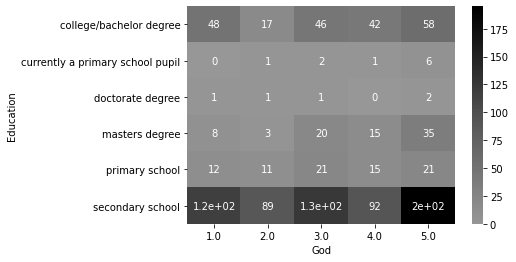

In [ ]:
cont_table = pd.crosstab(response_df['Education'],response_df['God'])
sns.heatmap(cont_table,annot=True, center=0.5 ,cmap="Greys")

In [ ]:
response_df.query('Education== "currently a primary school pupil" & God==2')

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
950,5.0,3.0,2.0,3.0,NaN,4.0,2.0,4.0,5.0,5.0,...,15.0,190.0,85.0,0.0,male,left handed,currently a primary school pupil,yes,village,house/bungalow


In [ ]:
response_df.query('Education== "currently a primary school pupil" & God==4')

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
158,5.0,3.0,4.0,2.0,1.0,3.0,2.0,5.0,4.0,1.0,...,15.0,160.0,48.0,2.0,female,right handed,currently a primary school pupil,no,village,block of flats


In [ ]:
response_df.query('Education== "doctorate degree" & God==1')

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
668,5.0,3.0,1.0,2.0,3.0,4.0,2.0,2.0,5.0,5.0,...,27.0,186.0,82.0,1.0,male,left handed,doctorate degree,yes,city,house/bungalow


In [ ]:
response_df.query('Education== "doctorate degree" & God==2')

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
796,3.0,5.0,3.0,2.0,2.0,4.0,3.0,5.0,1.0,4.0,...,27.0,189.0,113.0,3.0,male,left handed,doctorate degree,no,city,house/bungalow


In [ ]:
response_df.query('Education== "doctorate degree" & God==3')

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
793,2.0,3.0,3.0,1.0,2.0,3.0,3.0,3.0,2.0,4.0,...,24.0,185.0,120.0,2.0,male,right handed,doctorate degree,no,city,house/bungalow


#### Example of detecting outliers across two attributes one categorical and the other numerical

<AxesSubplot:xlabel='Age', ylabel='Education'>

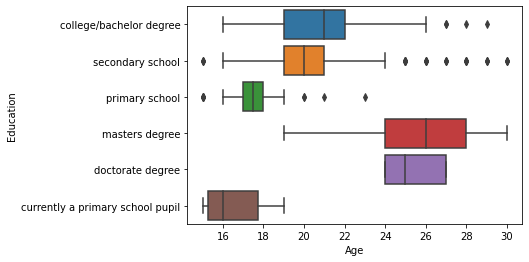

In [ ]:
sns.boxplot(x=response_df.Age,y=response_df.Education)

In [ ]:
BM1 = (response_df.Education=='college/bachelor degree') & (response_df.Age>26)
BM2 = (response_df.Education == 'secondary school') & ((response_df.Age>24) | (response_df.Age<16))
BM3 = (response_df.Education == 'primary school') & ((response_df.Age>19) | (response_df.Age<16))
BM = BM1 | BM2 | BM3
response_df[BM]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
30,4.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,2.0,...,25.0,183.0,87.0,1.0,male,right handed,secondary school,no,city,block of flats
40,4.0,3.0,4.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,...,26.0,172.0,62.0,1.0,female,right handed,secondary school,no,city,block of flats
49,5.0,4.0,2.0,1.0,2.0,2.0,2.0,3.0,5.0,3.0,...,20.0,157.0,41.0,1.0,female,right handed,primary school,no,city,block of flats
72,5.0,3.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,2.0,...,28.0,168.0,52.0,1.0,female,right handed,secondary school,no,city,block of flats
128,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,...,15.0,173.0,49.0,3.0,female,left handed,primary school,no,city,house/bungalow
132,5.0,4.0,3.0,1.0,1.0,1.0,1.0,4.0,4.0,1.0,...,15.0,170.0,51.0,1.0,female,right handed,primary school,no,village,house/bungalow
167,3.0,3.0,3.0,2.0,2.0,NaN,2.0,3.0,4.0,3.0,...,21.0,183.0,98.0,1.0,male,right handed,primary school,no,village,house/bungalow
174,5.0,2.0,1.0,5.0,3.0,3.0,3.0,1.0,1.0,1.0,...,26.0,183.0,78.0,0.0,male,right handed,secondary school,yes,city,house/bungalow
202,5.0,3.0,5.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,...,15.0,181.0,63.0,0.0,male,right handed,primary school,yes,city,block of flats
215,1.0,3.0,2.0,2.0,1.0,1.0,1.0,3.0,1.0,1.0,...,27.0,180.0,80.0,2.0,male,right handed,secondary school,no,city,block of flats


### Multivariate Outlier detection
#### Example of detecting outliers across four attributes using clustering analysis

In [ ]:
dimensions = ['Country', 'Metal or Hardrock','Folk','Musical']
Xs = response_df[dimensions]

In [ ]:
Xs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            1005 non-null   float64
 1   Metal or Hardrock  1007 non-null   float64
 2   Folk               1005 non-null   float64
 3   Musical            1008 non-null   float64
dtypes: float64(4)
memory usage: 31.7 KB


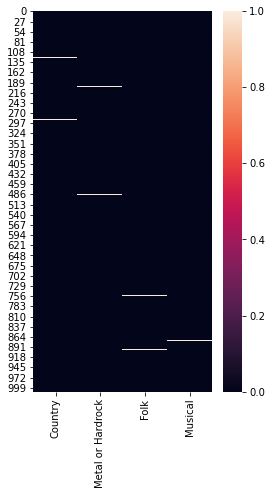

In [ ]:
plt.figure(figsize=(4,7))
sns.heatmap(Xs.isna())
plt.show()

In [ ]:
Q3 = Xs.quantile(0.75)
Q1 = Xs.quantile(0.25)
IQR = Q3 - Q1
Xs = Xs.fillna(Q3+IQR*1.5)

In [ ]:
Xs = (Xs - Xs.min())/(Xs.max()-Xs.min())

In [ ]:
from sklearn.cluster import KMeans
for k in range(2,8):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Xs)
    print('k={}'.format(k))
    for i in range(k):
        BM = kmeans.labels_==i
        print('Cluster {}: {}'.format(i,Xs[BM].index.values))
    print('--------- Divider ----------')

k=2
Cluster 0: [   0    3    4    6    7    9   10   11   13   14   16   17   22   23
   25   27   28   29   30   31   33   34   35   36   38   40   43   44
   45   47   48   50   53   56   57   58   60   61   63   64   67   69
   70   71   72   73   74   76   77   78   79   80   81   87   88   89
   90   92   94   95   97   98   99  102  103  106  110  111  112  113
  114  115  116  117  118  119  121  122  126  129  130  131  132  133
  134  136  137  138  139  140  142  143  144  145  146  148  149  152
  153  155  156  158  162  163  164  165  168  170  171  173  174  179
  183  184  185  186  187  188  191  192  194  195  197  199  202  207
  208  211  212  213  215  217  218  219  220  223  225  228  229  230
  232  237  238  239  240  241  242  243  244  246  247  250  251  252
  253  254  256  259  261  262  263  265  266  268  273  274  278  279
  282  283  284  285  286  287  289  290  292  294  296  297  298  299
  302  304  305  306  308  309  310  311  312  313  315  316  

### Time Series Outlier detection

## Dealing with outliers
### First Approach: Do nothing
### Second Approach: Replace with the upper cap or the lower cap
### Third Approach: Perform log transformation 
### Fourth Approach: Remove data objects with outliers	
### Choosing the right approach in dealing with outliers	
### Example 1

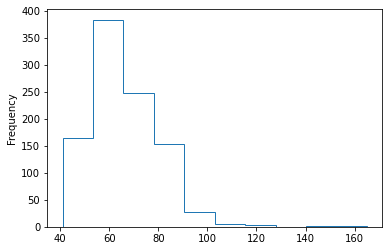

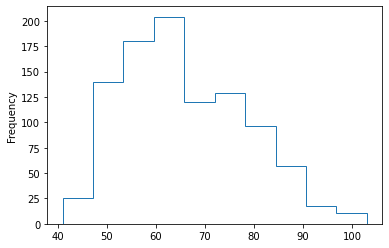

In [ ]:
response_df.Weight.plot.hist(histtype='step')
plt.show()
BM = response_df.Weight<105
response_df.Weight[BM].plot.hist(histtype='step')
plt.show()

### Example 2

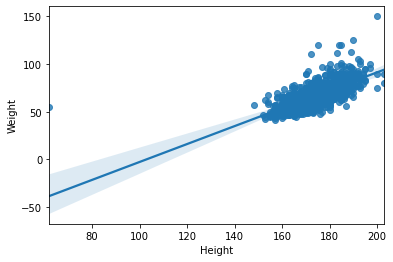

In [ ]:
sns.regplot(x='Height',
           y='Weight',data=response_df)
plt.show()

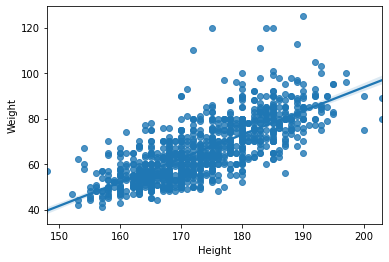

In [ ]:
BM = (response_df.Weight>130) | (response_df.Height<70)
sns.regplot(x='Height',
           y='Weight',data=response_df[~BM])
plt.show()

### Example 3

#### Dealing with missing values

In [ ]:
select_attributes = ['Weight','Height','Gender']
pre_process_df = pd.DataFrame(response_df[select_attributes])
pre_process_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  990 non-null    float64
 1   Height  990 non-null    float64
 2   Gender  1004 non-null   object 
dtypes: float64(2), object(1)
memory usage: 23.8+ KB


In [ ]:
pre_process_df.dropna(inplace=True)

In [ ]:
pre_process_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 975 entries, 0 to 1009
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  975 non-null    float64
 1   Height  975 non-null    float64
 2   Gender  975 non-null    object 
dtypes: float64(2), object(1)
memory usage: 30.5+ KB


#### Detecting univariate outliers and dealing with them

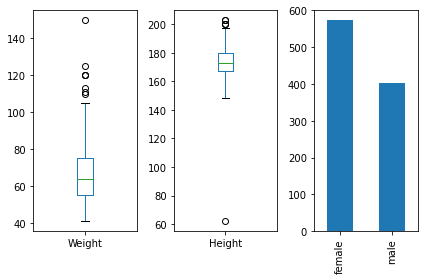

In [ ]:
num_attributes = ['Weight','Height']
for i,att in enumerate(num_attributes):
    plt.subplot(1,3,i+1)
    pre_process_df[att].plot.box()

plt.subplot(1,3,3)
pre_process_df.Gender.value_counts().plot.bar()
plt.tight_layout()
plt.show()

In [ ]:
Q3 = pre_process_df.Weight.quantile(0.75)
Q1 = pre_process_df.Weight.quantile(0.25)
IQR = Q3 - Q1

upper_cap = Q3+IQR*1.5

BM = pre_process_df.Weight > upper_cap
pre_process_df.loc[pre_process_df[BM].index,'Weight'] = upper_cap

<AxesSubplot:>

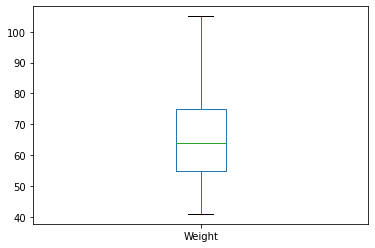

In [ ]:
pre_process_df.Weight.plot.box()

In [ ]:
Q3 = pre_process_df.Height.quantile(0.75)
Q1 = pre_process_df.Height.quantile(0.25)
IQR = Q3 - Q1

lower_cap = Q1-IQR*1.5
upper_cap = Q3+IQR*1.5

BM = pre_process_df.Height < lower_cap
pre_process_df.loc[pre_process_df[BM].index,'Height'] = lower_cap

BM = pre_process_df.Height > upper_cap
pre_process_df.loc[pre_process_df[BM].index,'Height'] = upper_cap

<AxesSubplot:>

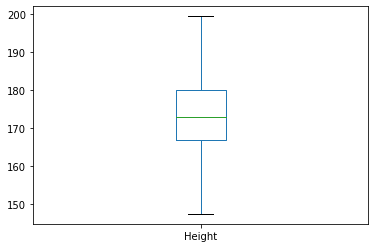

In [ ]:
pre_process_df.Height.plot.box()

#### Detecting bivariate outliers and dealing with them

<AxesSubplot:xlabel='Height', ylabel='Weight'>

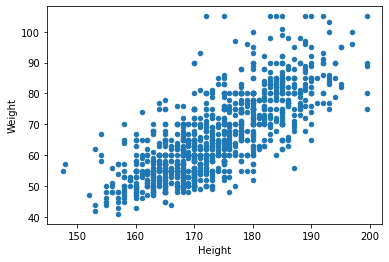

In [ ]:
pre_process_df.plot.scatter(x='Height',y='Weight')

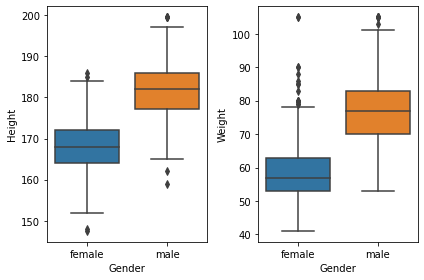

In [ ]:
plt.subplot(1,2,1)
sns.boxplot(y=pre_process_df.Height,x=pre_process_df.Gender)
plt.subplot(1,2,2)
sns.boxplot(y=pre_process_df.Weight, x=pre_process_df.Gender)
plt.tight_layout()

In [ ]:
for poss in pre_process_df.Gender.unique():
    BM = pre_process_df.Gender == poss
    wdf = pre_process_df[BM]
    Q3 = wdf.Height.quantile(0.75)
    Q1 = wdf.Height.quantile(0.25)
    IQR = Q3 - Q1

    lower_cap = Q1-IQR*1.5
    upper_cap = Q3+IQR*1.5
    
    BM = wdf.Height > upper_cap
    pre_process_df.loc[wdf[BM].index,'Height'] = upper_cap
    
    BM = wdf.Height < lower_cap
    pre_process_df.loc[wdf[BM].index,'Height'] = lower_cap

In [ ]:
for poss in pre_process_df.Gender.unique():
    BM = pre_process_df.Gender == poss
    wdf = pre_process_df[BM]
    Q3 = wdf.Weight.quantile(0.75)
    Q1 = wdf.Weight.quantile(0.25)
    IQR = Q3 - Q1

    lower_cap = Q1-IQR*1.5
    upper_cap = Q3+IQR*1.5
    
    BM = wdf.Weight > upper_cap
    pre_process_df.loc[wdf[BM].index,'Weight'] = upper_cap
    
    BM = wdf.Weight < lower_cap
    pre_process_df.loc[wdf[BM].index,'Weight'] = lower_cap

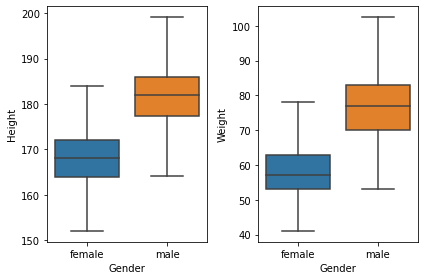

In [ ]:
plt.subplot(1,2,1)
sns.boxplot(y=pre_process_df.Height,x=pre_process_df.Gender)
plt.subplot(1,2,2)
sns.boxplot(y=pre_process_df.Weight, x=pre_process_df.Gender)
plt.tight_layout()

#### Detecting multivariate outliers and dealing with them

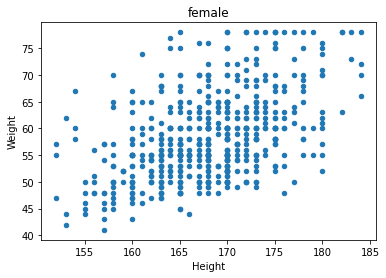

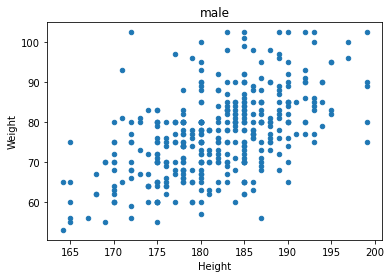

In [ ]:
cat_attribute_poss = pre_process_df.Gender.unique()
for i,poss in enumerate(cat_attribute_poss):
    BM = pre_process_df.Gender == poss
    pre_process_df[BM].plot.scatter(x='Height',y='Weight')
    plt.title(poss)
    plt.show()

#### Applying linear regression 

In [ ]:
pre_process_df.Gender.replace({'male':0,'female':1},inplace=True)

In [ ]:
from sklearn.linear_model import LinearRegression

X = ['Height','Gender']
y = 'Weight'

data_X = pre_process_df[X]
data_y = pre_process_df[y]

lm = LinearRegression()
lm.fit(data_X, data_y)

LinearRegression()

In [ ]:
print('intercept (b0) ', lm.intercept_)
coef_names = ['b1','b2']
print(pd.DataFrame({'Predictor': data_X.columns,
                    'coefficient Name':coef_names, 
                    'coefficient Value': lm.coef_}))

intercept (b0)  -51.10382582783839
  Predictor coefficient Name  coefficient Value
0    Height               b1           0.704025
1    Gender               b2          -8.602017


### Example 4

In [ ]:
select_attributes = ['Weight','Height','Gender']
pre_process_df = pd.DataFrame(response_df[select_attributes])
pre_process_df.dropna(inplace=True)
pre_process_df.Gender.replace({'male':0,'female':1},inplace=True)

In [ ]:
from sklearn.neural_network import MLPRegressor

X = ['Height','Gender']
y = 'Weight'

data_X = pre_process_df[X]
data_y = pre_process_df[y]

mlp = MLPRegressor(hidden_layer_sizes=5, max_iter=3000)
mlp.fit(data_X, data_y)

MLPRegressor(hidden_layer_sizes=5, max_iter=3000)

In [ ]:
newData = pd.DataFrame({'Height':189.5,'Gender':0},
                       index=[0])
mlp.predict(newData)

array([79.89579149])

### Example 5

In [ ]:
community_df = pd.read_csv('chicago_population.csv')
community_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        77 non-null     object 
 1   population  77 non-null     int64  
 2   income      77 non-null     int64  
 3   latino      77 non-null     float64
 4   black       77 non-null     float64
 5   white       77 non-null     float64
 6   asian       77 non-null     float64
 7   other       77 non-null     float64
dtypes: float64(5), int64(2), object(1)
memory usage: 4.9+ KB


#### Detecting univariate outliers and dealing with them

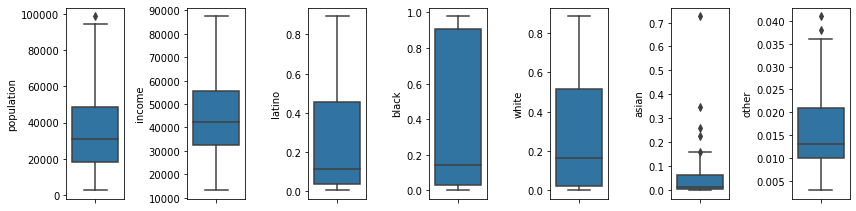

In [ ]:
numerical_atts = ['population', 'income', 'latino', 'black', 'white', 'asian','other']
plt.figure(figsize=(12,3))
for i,att in enumerate(numerical_atts):
    plt.subplot(1,len(numerical_atts),i+1)
    sns.boxplot(y=community_df[att])
plt.tight_layout()
plt.show()

In [ ]:
pre_process_df = community_df.set_index('name')
candidate_atts = ['population','asian','other']

for att in candidate_atts:
    Q3 = pre_process_df[att].quantile(0.75)
    Q1 = pre_process_df[att].quantile(0.25)
    IQR = Q3 - Q1

    lower_cap = Q1-IQR*1.5
    upper_cap = Q3+IQR*1.5

    BM = pre_process_df[att] < lower_cap
    candidate_index = pre_process_df[BM].index
    pre_process_df.loc[candidate_index,att] = lower_cap

    BM = pre_process_df[att] > upper_cap
    candidate_index = pre_process_df[BM].index
    pre_process_df.loc[candidate_index,att] = upper_cap

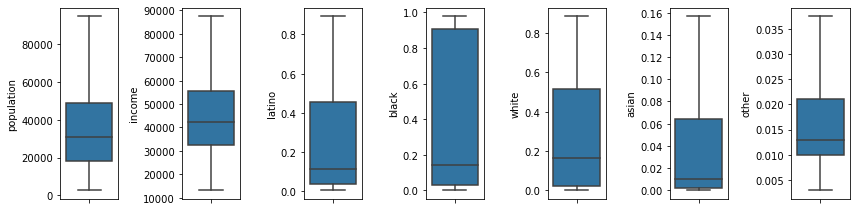

In [ ]:
numerical_atts = ['population', 'income', 'latino', 'black', 'white', 'asian','other']
plt.figure(figsize=(12,3))
for i,att in enumerate(numerical_atts):
    plt.subplot(1,len(numerical_atts),i+1)
    sns.boxplot(y=pre_process_df[att])
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
dimensions = ['population', 'income', 'latino', 'black', 'white', 'asian','other']
Xs = pre_process_df[dimensions]
Xs = (Xs - Xs.min())/(Xs.max()-Xs.min())
kmeans = KMeans(n_clusters=5)
kmeans.fit(Xs)

KMeans(n_clusters=5)

In [ ]:
for i in range(5):
    BM = kmeans.labels_==i
    print('Cluster {}: {}'.format(i,pre_process_df[BM].index.values))

Cluster 0: ['Austin' 'West Garfield Park' 'East Garfield Park' 'North Lawndale'
 'Douglas' 'Oakland' 'Fuller Park' 'Grand Boulevard' 'Kenwood'
 'Washington Park' 'Woodlawn' 'South Shore' 'Chatham' 'Avalon Park'
 'South Chicago' 'Burnside' 'Calumet Heights' 'Roseland' 'Pullman'
 'South Deering' 'West Pullman' 'Riverdale' 'West Englewood' 'Englewood'
 'Greater Grand Crossing' 'Auburn Gresham' 'Washington Heights'
 'Morgan Park']
Cluster 1: ['Armour Square' 'McKinley Park' 'Bridgeport']
Cluster 2: ['Montclare' 'Belmont Cragin' 'Hermosa' 'Avondale' 'Logan Square'
 'Humboldt Park' 'South Lawndale' 'Lower West Side' 'East Side'
 'Hegewisch' 'Garfield Ridge' 'Archer Heights' 'Brighton Park' 'New City'
 'West Elsdon' 'Gage Park' 'Clearing' 'West Lawn' 'Chicago Lawn' 'Ashburn']
Cluster 3: ['North Center' 'Lake View' 'Lincoln Park' 'Near North Side' 'Edison Park'
 'Norwood Park' 'Jefferson Park' 'Forest Glen' 'Portage Park' 'Dunning'
 'West Town' 'Beverly' 'Mount Greenwood' "O'Hare"]
Cluster 4: 

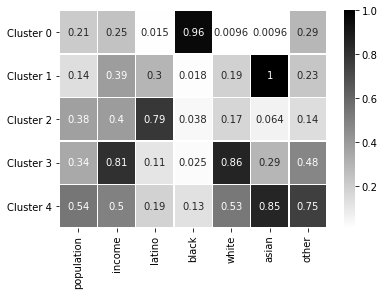

In [ ]:
clusters = ['Cluster {}'.format(i) for i in range(5)]

Centroids = pd.DataFrame(0.0, index =  clusters,
                        columns = Xs.columns)
for i,clst in enumerate(clusters):
    BM = kmeans.labels_==i
    Centroids.loc[clst] = Xs[BM].median(axis=0)

sns.heatmap(Centroids, linewidths=.5, annot=True, 
                    cmap='binary')
plt.show()

In [ ]:
hour_df = pd.read_excel('CustomerEnteries.xlsx')
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         495 non-null    datetime64[ns]
 1   Time         495 non-null    int64         
 2   N_Customers  495 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 11.7 KB


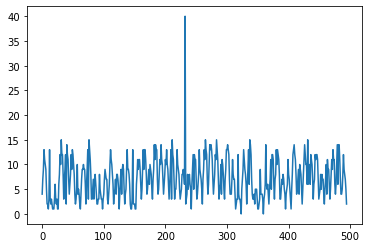

In [ ]:
hour_df.N_Customers.plot()
plt.show()

In [ ]:
hour_df[hour_df.N_Customers>20]

,Date,Time,N_Customers
232,2020-10-26,16,40


In [ ]:
err_index = hour_df[hour_df.N_Customers>20].index
hour_df.at[err_index,'N_Customers']=np.nan

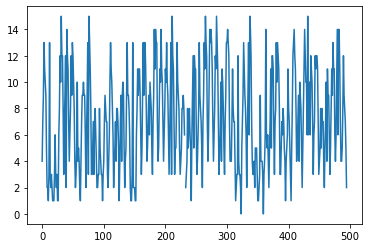

In [ ]:
hour_df.N_Customers.plot()
plt.show()

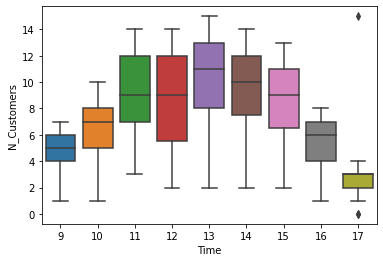

In [ ]:
sns.boxplot(y=hour_df.N_Customers,x=hour_df.Time)
plt.show()

In [ ]:
hour_df.query("Time==17 and N_Customers>12")

,Date,Time,N_Customers
431,2020-11-17,17,15.0


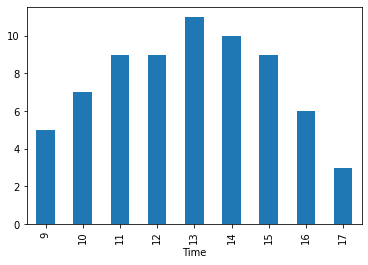

In [ ]:
hour_df.groupby('Time').N_Customers.median().plot.bar()
plt.show()

# Summary